In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import numpy as np
import seaborn as sns

%matplotlib inline

## Read in csv file, skipping first two rows to set correct column headers

In [2]:
smileon = pd.read_csv('../data/Smileon.2021.10.17.csv', skiprows=2)

C:\Users\hudso\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2,32,36,53,58,59,77,83,89,93,105,127,141,144) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


#### The following code displays all columns on this wide dataset

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
smileon.tail(2)

,CallReportNum,ReportVersion,LinkedToCallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,PhoneWorkerNum,WasRealCall,WasHangup,WasSexCall,WasWrongNumber,WasPrankCall,WasSilentCall,GeoCode,GeoAssignment,CityName,CountyName,StateProvince,CountryName,PostalCode,CensusDivision,CensusTrack,CensusReportingArea,211Region,PhoneType,ThirdPartyName,ThirdPartyOrganization,ThirdPartyPhoneNumber,ThirdPartyAddress,ThirdPartyCity,ThirdPartyCounty,ThirdPartyStateProvince,ThirdPartyPostalCode,Narrative,VolunteerComments,Feedback,CallersFeedback,TextField2,TextField3,TextField4,TextField5,TextField6,TextField7,TextField8,TextField9,TextField10,EnteredByWorkerNum,EnteredOn,Supervisor,Reviewed,FeedbackStatus,FeedbackFromPhoneWorkerNum,FeedbackFromPhoneWorkerName,ReferralsMade,IPAddress,OrgNum,VolIdentifier,SMILE ON 60+ Demographic Information - # of People in Household,Birth Year,SMILE ON 60+ Demographic Information - Other Language,SMILE ON 60+ Notes (Optional) - Notes,SMILE ON 60+ Oral Care Encounter - 1351 - Quantity,SMILE ON 60+ Oral Care Encounter - 1354 - Quantity,SMILE ON 60+ Oral Care Encounter - 2140 - Quantity,SMILE ON 60+ Oral Care Encounter - 2150 - Quantity,SMILE ON 60+ Oral Care Encounter - 2160 - Quantity,SMILE ON 60+ Oral Care Encounter - 2161 - Quantity,SMILE ON 60+ Oral Care Encounter - 220 - Quantity,SMILE ON 60+ Oral Care Encounter - 230 - Quantity,SMILE ON 60+ Oral Care Encounter - 2330 - Quantity,SMILE ON 60+ Oral Care Encounter - 2331 - Quantity,SMILE ON 60+ Oral Care Encounter - 2332 - Quantity,SMILE ON 60+ Oral Care Encounter - 2335 - Quantity,SMILE ON 60+ Oral Care Encounter - 2390 - Quantity,SMILE ON 60+ Oral Care Encounter - 2391 - Quantity,SMILE ON 60+ Oral Care Encounter - 2392 - Quantity,SMILE ON 60+ Oral Care Encounter - 2393 - Quantity,SMILE ON 60+ Oral Care Encounter - 2394 - Quantity,SMILE ON 60+ Oral Care Encounter - 2915 - Quantity,SMILE ON 60+ Oral Care Encounter - 2920 - Quantity,SMILE ON 60+ Oral Care Encounter - 2933 - Quantity,SMILE ON 60+ Oral Care Encounter - 2940 - Quantity,SMILE ON 60+ Oral Care Encounter - 2950 - Quantity,SMILE ON 60+ Oral Care Encounter - 2954 - Quantity,SMILE ON 60+ Oral Care Encounter - 2955 - Quantity,SMILE ON 60+ Oral Care Encounter - 2980 - Quantity,SMILE ON 60+ Oral Care Encounter - 3220 - Quantity,SMILE ON 60+ Oral Care Encounter - 4341 - Quantity,SMILE ON 60+ Oral Care Encounter - 4342 - Quantity,SMILE ON 60+ Oral Care Encounter - 6930 - Quantity,SMILE ON 60+ Oral Care Encounter - 6980 - Quantity,SMILE ON 60+ Oral Care Encounter - 7111 - Quantity,SMILE ON 60+ Oral Care Encounter - 7140 - Quantity,SMILE ON 60+ Oral Care Encounter - 7210 - Quantity,SMILE ON 60+ Oral Care Encounter - 7220 - Quantity,SMILE ON 60+ Oral Care Encounter - 7230 - Quantity,SMILE ON 60+ Oral Care Encounter - 7240 - Quantity,SMILE ON 60+ Oral Care Encounter - 7241 - Quantity,SMILE ON 60+ Oral Care Encounter - 7250 - Quantity,SMILE ON 60+ Oral Care Encounter - 7261 - Quantity,SMILE ON 60+ Oral Care Encounter - 7285 - Quantity,SMILE ON 60+ Oral Care Encounter - 7286 - Quantity,SMILE ON 60+ Oral Care Encounter - 7310 - Quantity,SMILE ON 60+ Oral Care Encounter - 7311 - Quantity,SMILE ON 60+ Oral Care Encounter - 7320 - Quantity,SMILE ON 60+ Oral Care Encounter - 7321 - Quantity,SMILE ON 60+ Oral Care Encounter - 7410 - Quantity,SMILE ON 60+ Oral Care Encounter - 7411 - Quantity,SMILE ON 60+ Oral Care Encounter - 7412 - Quantity,SMILE ON 60+ Oral Care Encounter - 7413 - Quantity,SMILE ON 60+ Oral Care Encounter - 7414 - Quantity,SMILE ON 60+ Oral Care Encounter - 7415 - Quantity,SMILE ON 60+ Oral Care Encounter - 7440 - Quantity,SMILE ON 60+ Oral Care Encounter - 7450 - Quantity,SMILE ON 60+ Oral Care Encounter - 7451 - Quantity,SMILE ON 60+ Oral Care Encounter - 7460 - Quantity,SMILE ON 60+ Oral Care Encounter - 7461 - Quantity,SMILE ON 60+ Oral Care Encounter - 7471 - Quantity,SMILE ON 60+ Oral Care Encounter - 7510 - Quantity,SMILE ON 60+ Oral Care Encounter - 7511 - Quantity,SMILE 

#### Member 2807762 has no data, therefore removed from dataset

In [5]:
smileon = smileon.drop(smileon.index[[44358]])

## Identified 34 columns that were 'unused' and another that had only one entry; deleting these columns from the dataframe

In [6]:
cols = [2,8,9,10,11,12,13,14,15,21,22,23,24,26,27,28,29,30,31,32,33,35,37,38,39,40,41,42,43,44,45,46,49,55,57]
smileon.drop(smileon.columns[cols], axis=1, inplace=True)

In [7]:
smileon.head(2)

,CallReportNum,ReportVersion,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,PhoneWorkerNum,CityName,CountyName,StateProvince,CountryName,PostalCode,PhoneType,Narrative,Feedback,EnteredByWorkerNum,EnteredOn,Reviewed,FeedbackStatus,FeedbackFromPhoneWorkerNum,FeedbackFromPhoneWorkerName,ReferralsMade,OrgNum,SMILE ON 60+ Demographic Information - # of People in Household,Birth Year,SMILE ON 60+ Demographic Information - Other Language,SMILE ON 60+ Notes (Optional) - Notes,SMILE ON 60+ Oral Care Encounter - 1351 - Quantity,SMILE ON 60+ Oral Care Encounter - 1354 - Quantity,SMILE ON 60+ Oral Care Encounter - 2140 - Quantity,SMILE ON 60+ Oral Care Encounter - 2150 - Quantity,SMILE ON 60+ Oral Care Encounter - 2160 - Quantity,SMILE ON 60+ Oral Care Encounter - 2161 - Quantity,SMILE ON 60+ Oral Care Encounter - 220 - Quantity,SMILE ON 60+ Oral Care Encounter - 230 - Quantity,SMILE ON 60+ Oral Care Encounter - 2330 - Quantity,SMILE ON 60+ Oral Care Encounter - 2331 - Quantity,SMILE ON 60+ Oral Care Encounter - 2332 - Quantity,SMILE ON 60+ Oral Care Encounter - 2335 - Quantity,SMILE ON 60+ Oral Care Encounter - 2390 - Quantity,SMILE ON 60+ Oral Care Encounter - 2391 - Quantity,SMILE ON 60+ Oral Care Encounter - 2392 - Quantity,SMILE ON 60+ Oral Care Encounter - 2393 - Quantity,SMILE ON 60+ Oral Care Encounter - 2394 - Quantity,SMILE ON 60+ Oral Care Encounter - 2915 - Quantity,SMILE ON 60+ Oral Care Encounter - 2920 - Quantity,SMILE ON 60+ Oral Care Encounter - 2933 - Quantity,SMILE ON 60+ Oral Care Encounter - 2940 - Quantity,SMILE ON 60+ Oral Care Encounter - 2950 - Quantity,SMILE ON 60+ Oral Care Encounter - 2954 - Quantity,SMILE ON 60+ Oral Care Encounter - 2955 - Quantity,SMILE ON 60+ Oral Care Encounter - 2980 - Quantity,SMILE ON 60+ Oral Care Encounter - 3220 - Quantity,SMILE ON 60+ Oral Care Encounter - 4341 - Quantity,SMILE ON 60+ Oral Care Encounter - 4342 - Quantity,SMILE ON 60+ Oral Care Encounter - 6930 - Quantity,SMILE ON 60+ Oral Care Encounter - 6980 - Quantity,SMILE ON 60+ Oral Care Encounter - 7111 - Quantity,SMILE ON 60+ Oral Care Encounter - 7140 - Quantity,SMILE ON 60+ Oral Care Encounter - 7210 - Quantity,SMILE ON 60+ Oral Care Encounter - 7220 - Quantity,SMILE ON 60+ Oral Care Encounter - 7230 - Quantity,SMILE ON 60+ Oral Care Encounter - 7240 - Quantity,SMILE ON 60+ Oral Care Encounter - 7241 - Quantity,SMILE ON 60+ Oral Care Encounter - 7250 - Quantity,SMILE ON 60+ Oral Care Encounter - 7261 - Quantity,SMILE ON 60+ Oral Care Encounter - 7285 - Quantity,SMILE ON 60+ Oral Care Encounter - 7286 - Quantity,SMILE ON 60+ Oral Care Encounter - 7310 - Quantity,SMILE ON 60+ Oral Care Encounter - 7311 - Quantity,SMILE ON 60+ Oral Care Encounter - 7320 - Quantity,SMILE ON 60+ Oral Care Encounter - 7321 - Quantity,SMILE ON 60+ Oral Care Encounter - 7410 - Quantity,SMILE ON 60+ Oral Care Encounter - 7411 - Quantity,SMILE ON 60+ Oral Care Encounter - 7412 - Quantity,SMILE ON 60+ Oral Care Encounter - 7413 - Quantity,SMILE ON 60+ Oral Care Encounter - 7414 - Quantity,SMILE ON 60+ Oral Care Encounter - 7415 - Quantity,SMILE ON 60+ Oral Care Encounter - 7440 - Quantity,SMILE ON 60+ Oral Care Encounter - 7450 - Quantity,SMILE ON 60+ Oral Care Encounter - 7451 - Quantity,SMILE ON 60+ Oral Care Encounter - 7460 - Quantity,SMILE ON 60+ Oral Care Encounter - 7461 - Quantity,SMILE ON 60+ Oral Care Encounter - 7471 - Quantity,SMILE ON 60+ Oral Care Encounter - 7510 - Quantity,SMILE ON 60+ Oral Care Encounter - 7511 - Quantity,SMILE ON 60+ Oral Care Encounter - 7970 - Mandibular Quantity,SMILE ON 60+ Oral Care Encounter - 7970 - Maxillary Quantity,SMILE ON 60+ Oral Care Encounter - 7971 - Quantity,SMILE ON 60+ Oral Care Encounter - 7972 - Quantity,SMILE ON 60+ Oral Care Encounter - 9110 - Quantity,SMILE ON 60+ Oral Care Encounter - 9951 - Quantity,SMILE ON 60+ Oral Care Encounter - Lab Assist narrative,SMILE ON 60+ Oral Care Encounter - No Code - Denture Step Mandibular Quantity,SMILE ON 60+ Oral Care Encounter - No Code - 

## Continuing the data cleaning process, deleting any reference to 'Smile On 60' in column headers

In [8]:
smileon_ls = smileon.columns.tolist()
smileon_ls


['CallReportNum',
 'ReportVersion',
 'CallDateAndTimeStart',
 'CallDateAndTimeEnd',
 'CallLength',
 'CallerNum',
 'PhoneWorkerNum',
 'CityName',
 'CountyName',
 'StateProvince',
 'CountryName',
 'PostalCode',
 'PhoneType',
 'Narrative',
 'Feedback',
 'EnteredByWorkerNum',
 'EnteredOn',
 'Reviewed',
 'FeedbackStatus',
 'FeedbackFromPhoneWorkerNum',
 'FeedbackFromPhoneWorkerName',
 'ReferralsMade',
 'OrgNum',
 'SMILE ON 60+ Demographic Information - # of People in Household',
 'Birth Year',
 'SMILE ON 60+ Demographic Information - Other Language',
 'SMILE ON 60+ Notes (Optional) - Notes',
 'SMILE ON 60+ Oral Care Encounter - 1351 - Quantity',
 'SMILE ON 60+ Oral Care Encounter - 1354 - Quantity',
 'SMILE ON 60+ Oral Care Encounter - 2140 - Quantity',
 'SMILE ON 60+ Oral Care Encounter - 2150 - Quantity',
 'SMILE ON 60+ Oral Care Encounter - 2160 - Quantity',
 'SMILE ON 60+ Oral Care Encounter - 2161 - Quantity',
 'SMILE ON 60+ Oral Care Encounter - 220 - Quantity',
 'SMILE ON 60+ Oral Ca

In [9]:
new_columns = []
for column in smileon_ls:
    new_column = column.replace('SMILE ON 60+ ', '')
    new_columns.append(new_column)


In [10]:
new_columns

['CallReportNum',
 'ReportVersion',
 'CallDateAndTimeStart',
 'CallDateAndTimeEnd',
 'CallLength',
 'CallerNum',
 'PhoneWorkerNum',
 'CityName',
 'CountyName',
 'StateProvince',
 'CountryName',
 'PostalCode',
 'PhoneType',
 'Narrative',
 'Feedback',
 'EnteredByWorkerNum',
 'EnteredOn',
 'Reviewed',
 'FeedbackStatus',
 'FeedbackFromPhoneWorkerNum',
 'FeedbackFromPhoneWorkerName',
 'ReferralsMade',
 'OrgNum',
 'Demographic Information - # of People in Household',
 'Birth Year',
 'Demographic Information - Other Language',
 'Notes (Optional) - Notes',
 'Oral Care Encounter - 1351 - Quantity',
 'Oral Care Encounter - 1354 - Quantity',
 'Oral Care Encounter - 2140 - Quantity',
 'Oral Care Encounter - 2150 - Quantity',
 'Oral Care Encounter - 2160 - Quantity',
 'Oral Care Encounter - 2161 - Quantity',
 'Oral Care Encounter - 220 - Quantity',
 'Oral Care Encounter - 230 - Quantity',
 'Oral Care Encounter - 2330 - Quantity',
 'Oral Care Encounter - 2331 - Quantity',
 'Oral Care Encounter - 233

In [11]:
smileon.columns = new_columns

In [12]:
smileon.columns

Index(['CallReportNum', 'ReportVersion', 'CallDateAndTimeStart',
       'CallDateAndTimeEnd', 'CallLength', 'CallerNum', 'PhoneWorkerNum',
       'CityName', 'CountyName', 'StateProvince',
       ...
       'Screening - Treatment Urgency', 'Screening - Untreated Decay',
       'Site Information - Enroller ID',
       'Site Information - Enroller Location',
       'Treatment Plan - Action: Upload After Picture on Finish Tab',
       'Treatment Plan - Is the treatment plan completed?',
       'Treatment Plan - Was a treatment plan developed?',
       'Treatment Plan - Was the enrollee able to be restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free)',
       'Verification of Eligibility - Transportation Arranged',
       'Verification of Eligibility - Verification of Eligibility'],
      dtype='object', length=149)

In [13]:
smileon_ls = smileon.columns.tolist()
smileon_ls

['CallReportNum',
 'ReportVersion',
 'CallDateAndTimeStart',
 'CallDateAndTimeEnd',
 'CallLength',
 'CallerNum',
 'PhoneWorkerNum',
 'CityName',
 'CountyName',
 'StateProvince',
 'CountryName',
 'PostalCode',
 'PhoneType',
 'Narrative',
 'Feedback',
 'EnteredByWorkerNum',
 'EnteredOn',
 'Reviewed',
 'FeedbackStatus',
 'FeedbackFromPhoneWorkerNum',
 'FeedbackFromPhoneWorkerName',
 'ReferralsMade',
 'OrgNum',
 'Demographic Information - # of People in Household',
 'Birth Year',
 'Demographic Information - Other Language',
 'Notes (Optional) - Notes',
 'Oral Care Encounter - 1351 - Quantity',
 'Oral Care Encounter - 1354 - Quantity',
 'Oral Care Encounter - 2140 - Quantity',
 'Oral Care Encounter - 2150 - Quantity',
 'Oral Care Encounter - 2160 - Quantity',
 'Oral Care Encounter - 2161 - Quantity',
 'Oral Care Encounter - 220 - Quantity',
 'Oral Care Encounter - 230 - Quantity',
 'Oral Care Encounter - 2330 - Quantity',
 'Oral Care Encounter - 2331 - Quantity',
 'Oral Care Encounter - 233

## Further cleaning to substitute one word for 2 or more in order to shorten length of column headers

In [14]:
new_columns = []
for column in smileon_ls:
    new_column = column.replace('Oral Care Encounter', 'code')
    new_columns.append(new_column)

In [15]:
new_columns

['CallReportNum',
 'ReportVersion',
 'CallDateAndTimeStart',
 'CallDateAndTimeEnd',
 'CallLength',
 'CallerNum',
 'PhoneWorkerNum',
 'CityName',
 'CountyName',
 'StateProvince',
 'CountryName',
 'PostalCode',
 'PhoneType',
 'Narrative',
 'Feedback',
 'EnteredByWorkerNum',
 'EnteredOn',
 'Reviewed',
 'FeedbackStatus',
 'FeedbackFromPhoneWorkerNum',
 'FeedbackFromPhoneWorkerName',
 'ReferralsMade',
 'OrgNum',
 'Demographic Information - # of People in Household',
 'Birth Year',
 'Demographic Information - Other Language',
 'Notes (Optional) - Notes',
 'code - 1351 - Quantity',
 'code - 1354 - Quantity',
 'code - 2140 - Quantity',
 'code - 2150 - Quantity',
 'code - 2160 - Quantity',
 'code - 2161 - Quantity',
 'code - 220 - Quantity',
 'code - 230 - Quantity',
 'code - 2330 - Quantity',
 'code - 2331 - Quantity',
 'code - 2332 - Quantity',
 'code - 2335 - Quantity',
 'code - 2390 - Quantity',
 'code - 2391 - Quantity',
 'code - 2392 - Quantity',
 'code - 2393 - Quantity',
 'code - 2394 -

In [16]:
smileon.columns = new_columns

In [17]:
smileon_ls = smileon.columns.tolist()
smileon_ls

['CallReportNum',
 'ReportVersion',
 'CallDateAndTimeStart',
 'CallDateAndTimeEnd',
 'CallLength',
 'CallerNum',
 'PhoneWorkerNum',
 'CityName',
 'CountyName',
 'StateProvince',
 'CountryName',
 'PostalCode',
 'PhoneType',
 'Narrative',
 'Feedback',
 'EnteredByWorkerNum',
 'EnteredOn',
 'Reviewed',
 'FeedbackStatus',
 'FeedbackFromPhoneWorkerNum',
 'FeedbackFromPhoneWorkerName',
 'ReferralsMade',
 'OrgNum',
 'Demographic Information - # of People in Household',
 'Birth Year',
 'Demographic Information - Other Language',
 'Notes (Optional) - Notes',
 'code - 1351 - Quantity',
 'code - 1354 - Quantity',
 'code - 2140 - Quantity',
 'code - 2150 - Quantity',
 'code - 2160 - Quantity',
 'code - 2161 - Quantity',
 'code - 220 - Quantity',
 'code - 230 - Quantity',
 'code - 2330 - Quantity',
 'code - 2331 - Quantity',
 'code - 2332 - Quantity',
 'code - 2335 - Quantity',
 'code - 2390 - Quantity',
 'code - 2391 - Quantity',
 'code - 2392 - Quantity',
 'code - 2393 - Quantity',
 'code - 2394 -

In [18]:
new_columns = []
for column in smileon_ls:
    new_column = column.replace('Base-line Oral and Conditions Questions', 'questions')
    new_columns.append(new_column)

In [19]:
new_columns

['CallReportNum',
 'ReportVersion',
 'CallDateAndTimeStart',
 'CallDateAndTimeEnd',
 'CallLength',
 'CallerNum',
 'PhoneWorkerNum',
 'CityName',
 'CountyName',
 'StateProvince',
 'CountryName',
 'PostalCode',
 'PhoneType',
 'Narrative',
 'Feedback',
 'EnteredByWorkerNum',
 'EnteredOn',
 'Reviewed',
 'FeedbackStatus',
 'FeedbackFromPhoneWorkerNum',
 'FeedbackFromPhoneWorkerName',
 'ReferralsMade',
 'OrgNum',
 'Demographic Information - # of People in Household',
 'Birth Year',
 'Demographic Information - Other Language',
 'Notes (Optional) - Notes',
 'code - 1351 - Quantity',
 'code - 1354 - Quantity',
 'code - 2140 - Quantity',
 'code - 2150 - Quantity',
 'code - 2160 - Quantity',
 'code - 2161 - Quantity',
 'code - 220 - Quantity',
 'code - 230 - Quantity',
 'code - 2330 - Quantity',
 'code - 2331 - Quantity',
 'code - 2332 - Quantity',
 'code - 2335 - Quantity',
 'code - 2390 - Quantity',
 'code - 2391 - Quantity',
 'code - 2392 - Quantity',
 'code - 2393 - Quantity',
 'code - 2394 -

In [20]:
smileon.columns = new_columns

In [21]:
smileon_ls = smileon.columns.tolist()
smileon_ls

['CallReportNum',
 'ReportVersion',
 'CallDateAndTimeStart',
 'CallDateAndTimeEnd',
 'CallLength',
 'CallerNum',
 'PhoneWorkerNum',
 'CityName',
 'CountyName',
 'StateProvince',
 'CountryName',
 'PostalCode',
 'PhoneType',
 'Narrative',
 'Feedback',
 'EnteredByWorkerNum',
 'EnteredOn',
 'Reviewed',
 'FeedbackStatus',
 'FeedbackFromPhoneWorkerNum',
 'FeedbackFromPhoneWorkerName',
 'ReferralsMade',
 'OrgNum',
 'Demographic Information - # of People in Household',
 'Birth Year',
 'Demographic Information - Other Language',
 'Notes (Optional) - Notes',
 'code - 1351 - Quantity',
 'code - 1354 - Quantity',
 'code - 2140 - Quantity',
 'code - 2150 - Quantity',
 'code - 2160 - Quantity',
 'code - 2161 - Quantity',
 'code - 220 - Quantity',
 'code - 230 - Quantity',
 'code - 2330 - Quantity',
 'code - 2331 - Quantity',
 'code - 2332 - Quantity',
 'code - 2335 - Quantity',
 'code - 2390 - Quantity',
 'code - 2391 - Quantity',
 'code - 2392 - Quantity',
 'code - 2393 - Quantity',
 'code - 2394 -

In [22]:
new_columns = []
for column in smileon_ls:
    new_column = column.replace('Demographic Information', 'demographics')
    new_columns.append(new_column)

In [23]:
new_columns

['CallReportNum',
 'ReportVersion',
 'CallDateAndTimeStart',
 'CallDateAndTimeEnd',
 'CallLength',
 'CallerNum',
 'PhoneWorkerNum',
 'CityName',
 'CountyName',
 'StateProvince',
 'CountryName',
 'PostalCode',
 'PhoneType',
 'Narrative',
 'Feedback',
 'EnteredByWorkerNum',
 'EnteredOn',
 'Reviewed',
 'FeedbackStatus',
 'FeedbackFromPhoneWorkerNum',
 'FeedbackFromPhoneWorkerName',
 'ReferralsMade',
 'OrgNum',
 'demographics - # of People in Household',
 'Birth Year',
 'demographics - Other Language',
 'Notes (Optional) - Notes',
 'code - 1351 - Quantity',
 'code - 1354 - Quantity',
 'code - 2140 - Quantity',
 'code - 2150 - Quantity',
 'code - 2160 - Quantity',
 'code - 2161 - Quantity',
 'code - 220 - Quantity',
 'code - 230 - Quantity',
 'code - 2330 - Quantity',
 'code - 2331 - Quantity',
 'code - 2332 - Quantity',
 'code - 2335 - Quantity',
 'code - 2390 - Quantity',
 'code - 2391 - Quantity',
 'code - 2392 - Quantity',
 'code - 2393 - Quantity',
 'code - 2394 - Quantity',
 'code - 2

## Convert date columns from string to DateTime

In [24]:
smileon.columns = new_columns

In [25]:
smileon['CallDateAndTimeStart'] = pd.to_datetime(smileon['CallDateAndTimeStart'])

In [26]:
type(smileon.CallDateAndTimeStart[0])

pandas._libs.tslibs.timestamps.Timestamp

In [27]:
smileon['CallDateAndTimeEnd'] = pd.to_datetime(smileon['CallDateAndTimeEnd'])

In [28]:
smileon['EnteredOn'] = pd.to_datetime(smileon['EnteredOn'])

In [29]:
smileon[['EnteredOn', 'CallDateAndTimeStart', 'CallDateAndTimeEnd']]

,EnteredOn,CallDateAndTimeStart,CallDateAndTimeEnd
0,2021-09-30 16:57:00,2021-09-30 16:56:00,2021-09-30 16:57:00
1,2021-09-30 16:53:00,2021-09-30 16:53:00,2021-09-30 16:53:00
2,2021-09-30 16:51:00,2021-09-30 16:50:00,2021-09-30 16:51:00
3,2021-09-30 16:49:00,2021-09-30 16:48:00,2021-09-30 16:49:00
4,2021-09-30 16:48:00,2021-09-30 16:46:00,2021-09-30 16:48:00
...,...,...,...
57855,2018-08-21 08:08:00,2018-08-01 08:00:00,2018-08-01 08:08:00
57856,2019-10-16 08:29:00,2018-05-31 08:27:00,2018-05-31 08:29:00
57857,2018-05-23 14:12:00,2018-05-23 14:11:00,2018-05-23 14:11:00
57858,2019-11-06 09:10:00,2018-05-15 09:06:00,2018-05-15 09:10:00


## Problematic column entitled 'Screening - Last Screening Date'; multiple cells causing conversion function to fail; must locate each and convert to a recognizable format prior to the DateTime conversion

In [30]:
smileon.loc[~smileon['Screening - Last Screening Date'].str.contains('/', na = False), 'Screening - Last Screening Date'].value_counts()

8.24.2020     6
9.15.2020     5
9.14.2020     3
8.17.2020     3
8.20.2020     2
08.24.2020    2
5212020       1
8212019       1
8.18.2020     1
9252019       1
2.18.19       1
8132019       1
2.12.19       1
9.11.2020     1
9.16.2020     1
8.21.2020     1
8.14.2020     1
10232020      1
3152019       1
11002019      1
11262019      1
8.19.2020     1
10312018      1
9052019       1
6022020       1
81519         1
8162019       1
09.14.2020    1
10082019      1
1222020       1
Name: Screening - Last Screening Date, dtype: int64

In [31]:
#smileon['Screening - Last Screening Date'] = pd.to_datetime(smileon['Screening - Last Screening Date'])

### Discovery:  the DateTime conversion can convert multiple types of date formats; it cannot, however, convert a string of numerics that has no punctuation or special characters separating components (day, month, year, etc)

In [32]:
smileon['Screening - Last Screening Date'].replace('6022020', '2020-06-02', inplace=True)

In [33]:
smileon['Screening - Last Screening Date'][17006]

'2020-06-02'

In [34]:
smileon['Screening - Last Screening Date'].replace('10232020', '2020-10-23', inplace=True)

In [35]:
smileon['Screening - Last Screening Date'][18893]

'2020-10-23'

### Conversion concept proven; will no longer verify conversion prior to DateTime conversion step

In [36]:
smileon['Screening - Last Screening Date'].replace('8212019', '2019-08-21', inplace=True)

In [37]:
smileon['Screening - Last Screening Date'].replace('10312018', '2018-10-31', inplace=True)

In [38]:
smileon['Screening - Last Screening Date'].replace('10082019', '2019-10-08', inplace=True)

In [39]:
smileon['Screening - Last Screening Date'].replace('11262019', '2019-11-26', inplace=True)

In [40]:
smileon['Screening - Last Screening Date'].replace('3152019', '2019-03-15', inplace=True)

In [41]:
smileon['Screening - Last Screening Date'].replace('81519', '2019-08-15', inplace=True)

In [42]:
smileon['Screening - Last Screening Date'].replace('11002019', '2019-11-01', inplace=True)

In [43]:
smileon['Screening - Last Screening Date'].replace('1222020', '2020-12-02', inplace=True)

In [44]:
smileon['Screening - Last Screening Date'].replace('8162019', '2019-08-16', inplace=True)

In [45]:
smileon['Screening - Last Screening Date'].replace('9252019', '2019-09-25', inplace=True)

In [46]:
smileon['Screening - Last Screening Date'].replace('9052019', '2019-09-05', inplace=True)

In [47]:
smileon['Screening - Last Screening Date'].replace('5212020', '2020-05-21', inplace=True)

In [48]:
smileon['Screening - Last Screening Date'].replace('8132019', '2019-08-13', inplace=True)

### Proof that conversion worked; dates without punctuation no longer present

In [49]:
smileon.loc[~smileon['Screening - Last Screening Date'].str.contains('/', na = False), 'Screening - Last Screening Date'].value_counts()

8.24.2020     6
9.15.2020     5
9.14.2020     3
8.17.2020     3
08.24.2020    2
8.20.2020     2
8.14.2020     1
9.16.2020     1
2019-08-16    1
9.11.2020     1
2020-12-02    1
2020-10-23    1
2019-08-15    1
2.18.19       1
2018-10-31    1
2.12.19       1
8.21.2020     1
8.18.2020     1
2020-06-02    1
2019-03-15    1
2019-10-08    1
2019-09-05    1
8.19.2020     1
2019-08-13    1
2020-05-21    1
2019-11-01    1
2019-11-26    1
09.14.2020    1
2019-08-21    1
2019-09-25    1
Name: Screening - Last Screening Date, dtype: int64

In [50]:
smileon['Screening - Last Screening Date'] = pd.to_datetime(smileon['Screening - Last Screening Date'])

### Proof that 4 DateTime columns correctly converted

In [51]:
smileon[['EnteredOn', 'CallDateAndTimeStart', 'CallDateAndTimeEnd', 'Screening - Last Screening Date']]

,EnteredOn,CallDateAndTimeStart,CallDateAndTimeEnd,Screening - Last Screening Date
0,2021-09-30 16:57:00,2021-09-30 16:56:00,2021-09-30 16:57:00,NaT
1,2021-09-30 16:53:00,2021-09-30 16:53:00,2021-09-30 16:53:00,NaT
2,2021-09-30 16:51:00,2021-09-30 16:50:00,2021-09-30 16:51:00,2019-10-08
3,2021-09-30 16:49:00,2021-09-30 16:48:00,2021-09-30 16:49:00,2020-11-10
4,2021-09-30 16:48:00,2021-09-30 16:46:00,2021-09-30 16:48:00,2021-09-10
...,...,...,...,...
57855,2018-08-21 08:08:00,2018-08-01 08:00:00,2018-08-01 08:08:00,NaT
57856,2019-10-16 08:29:00,2018-05-31 08:27:00,2018-05-31 08:29:00,2018-11-29
57857,2018-05-23 14:12:00,2018-05-23 14:11:00,2018-05-23 14:11:00,NaT
57858,2019-11-06 09:10:00,2018-05-15 09:06:00,2018-05-15 09:10:00,NaT


#### a fifth column, 'Verification of Eligibility - Verification Date' did not convert; team has decided not to pursue conversion at this time; unsure of the column's utility

In [52]:
#smileon['Verification of Eligibility - Verification Date']

In [53]:
#smileon['Verification of Eligibility - Verification Date'] = pd.to_datetime(smileon['Verification of Eligibility - Verification Date'])

## Subsetting df into 7 separate dataframes; each will contain the same 3 columns, plus unique columns; the common columns are 'CallReportNum', 'CallerNum', and 'CallDateAndTimeStart'

In [54]:
list= (['CallReportNum','CallerNum', 'ReportVersion', 'CallDateAndTimeStart','CallDateAndTimeEnd', 'CallLength', 'PhoneWorkerNum','CityName', 'CountyName', 'StateProvince',
        'CountryName', 'PostalCode', 'PhoneType', 'Narrative', 'Feedback', 'EnteredByWorkerNum', 'EnteredOn', 'Reviewed', 
        'FeedbackStatus','FeedbackFromPhoneWorkerNum', 'FeedbackFromPhoneWorkerName', 'ReferralsMade'])

intake = smileon[list]
intake.head(5)

,CallReportNum,CallerNum,ReportVersion,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,PhoneWorkerNum,CityName,CountyName,StateProvince,CountryName,PostalCode,PhoneType,Narrative,Feedback,EnteredByWorkerNum,EnteredOn,Reviewed,FeedbackStatus,FeedbackFromPhoneWorkerNum,FeedbackFromPhoneWorkerName,ReferralsMade
0,93115324,3638169,SMILE ON 60+ Registration,2021-09-30 16:56:00,2021-09-30 16:57:00,1,123747,Smyrna,Rutherford,TN,United States,37167.0,Mobile,spoke with client again concerning transfer to...,NaN,123747,2021-09-30 16:57:00,No,Not yet,NaN,NaN,NaN
1,93115188,4431194,SMILE ON 60+ Registration,2021-09-30 16:53:00,2021-09-30 16:53:00,0,123747,Nashville,Davidson,TN,United States,37211.0,NaN,Called client to follow up on app. LM for call...,NaN,123747,2021-09-30 16:53:00,No,Not yet,NaN,NaN,NaN
2,93115081,2941341,SMILE ON 60+ Clinical,2021-09-30 16:50:00,2021-09-30 16:51:00,1,161979,Memphis,Shelby,TN,United States,38104.0,NaN,NaN,NaN,161979,2021-09-30 16:51:00,No,Not yet,NaN,NaN,NaN
3,93115032,3823933,SMILE ON 60+ Clinical,2021-09-30 16:48:00,2021-09-30 16:49:00,1,161979,Memphis,Shelby,TN,United States,38109.0,NaN,NaN,NaN,161979,2021-09-30 16:49:00,No,Not yet,NaN,NaN,NaN
4,93114968,3348256,SMILE ON 60+ Clinical,2021-09-30 16:46:00,2021-09-30 16:48:00,2,161979,Memphis,Shelby,TN,United States,NaN,NaN,NaN,NaN,161979,2021-09-30 16:48:00,No,Not yet,NaN,NaN,NaN


In [55]:
codes_list = (['CallReportNum', 'CallerNum','CallDateAndTimeStart','code - 1351 - Quantity', 'code - 1354 - Quantity', 'code - 2140 - Quantity',
 'code - 2150 - Quantity', 'code - 2160 - Quantity', 'code - 2161 - Quantity', 'code - 220 - Quantity', 'code - 230 - Quantity',
 'code - 2330 - Quantity', 'code - 2331 - Quantity', 'code - 2332 - Quantity', 'code - 2335 - Quantity', 'code - 2390 - Quantity',
 'code - 2391 - Quantity', 'code - 2392 - Quantity', 'code - 2393 - Quantity', 'code - 2394 - Quantity', 'code - 2915 - Quantity',
 'code - 2920 - Quantity', 'code - 2933 - Quantity', 'code - 2940 - Quantity', 'code - 2950 - Quantity', 'code - 2954 - Quantity',
 'code - 2955 - Quantity', 'code - 2980 - Quantity', 'code - 3220 - Quantity', 'code - 4341 - Quantity', 'code - 4342 - Quantity',
 'code - 6930 - Quantity', 'code - 6980 - Quantity', 'code - 7111 - Quantity', 'code - 7140 - Quantity', 'code - 7210 - Quantity',
 'code - 7220 - Quantity', 'code - 7230 - Quantity', 'code - 7240 - Quantity', 'code - 7241 - Quantity', 'code - 7250 - Quantity',
 'code - 7261 - Quantity', 'code - 7285 - Quantity', 'code - 7286 - Quantity', 'code - 7310 - Quantity', 'code - 7311 - Quantity',
 'code - 7320 - Quantity', 'code - 7321 - Quantity', 'code - 7410 - Quantity', 'code - 7411 - Quantity', 'code - 7412 - Quantity',
 'code - 7413  - Quantity', 'code - 7414 - Quantity', 'code - 7415 - Quantity', 'code - 7440 - Quantity', 'code - 7450 - Quantity',
 'code - 7451 - Quantity', 'code - 7460 - Quantity', 'code - 7461 - Quantity', 'code - 7471 - Quantity', 'code - 7510 - Quantity',
 'code - 7511 - Quantity', 'code - 7970 - Mandibular Quantity', 'code - 7970 - Maxillary Quantity ', 'code - 7971 - Quantity',
 'code - 7972 - Quantity', 'code - 9110 - Quantity', 'code - 9951 - Quantity', 'code - Lab Assist narrative',
 'code - No Code - Denture Step Mandibular Quantity', 'code - No Code - Denture Step Maxillary Quantity',])

codes= smileon[codes_list]
codes.head(2)

,CallReportNum,CallerNum,CallDateAndTimeStart,code - 1351 - Quantity,code - 1354 - Quantity,code - 2140 - Quantity,code - 2150 - Quantity,code - 2160 - Quantity,code - 2161 - Quantity,code - 220 - Quantity,code - 230 - Quantity,code - 2330 - Quantity,code - 2331 - Quantity,code - 2332 - Quantity,code - 2335 - Quantity,code - 2390 - Quantity,code - 2391 - Quantity,code - 2392 - Quantity,code - 2393 - Quantity,code - 2394 - Quantity,code - 2915 - Quantity,code - 2920 - Quantity,code - 2933 - Quantity,code - 2940 - Quantity,code - 2950 - Quantity,code - 2954 - Quantity,code - 2955 - Quantity,code - 2980 - Quantity,code - 3220 - Quantity,code - 4341 - Quantity,code - 4342 - Quantity,code - 6930 - Quantity,code - 6980 - Quantity,code - 7111 - Quantity,code - 7140 - Quantity,code - 7210 - Quantity,code - 7220 - Quantity,code - 7230 - Quantity,code - 7240 - Quantity,code - 7241 - Quantity,code - 7250 - Quantity,code - 7261 - Quantity,code - 7285 - Quantity,code - 7286 - Quantity,code - 7310 - Quantity,code - 7311 - Quantity,code - 7320 - Quantity,code - 7321 - Quantity,code - 7410 - Quantity,code - 7411 - Quantity,code - 7412 - Quantity,code - 7413 - Quantity,code - 7414 - Quantity,code - 7415 - Quantity,code - 7440 - Quantity,code - 7450 - Quantity,code - 7451 - Quantity,code - 7460 - Quantity,code - 7461 - Quantity,code - 7471 - Quantity,code - 7510 - Quantity,code - 7511 - Quantity,code - 7970 - Mandibular Quantity,code - 7970 - Maxillary Quantity,code - 7971 - Quantity,code - 7972 - Quantity,code - 9110 - Quantity,code - 9951 - Quantity,code - Lab Assist narrative,code - No Code - Denture Step Mandibular Quantity,code - No Code - Denture Step Maxillary Quantity
0,93115324,3638169,2021-09-30 16:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93115188,4431194,2021-09-30 16:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
questions_list= (['CallReportNum', 'CallerNum','CallDateAndTimeStart','questions - Are you limited in what you can eat?', 'questions - Dental Clinic', 'questions - Did the client commit to referral?',
 'questions - Did you help in these other areas?', 'questions - Do you need help in these other areas?',
 'questions - Have you ever felt that the appearance of your mouth and teeth affected your quality of life?',
 'questions - How would you describe the condition of your mouth and teeth?', 'questions - What is the next step for client encounter?',
 'questions - What is the next step for clients encounter?', 'Case Management Information - Dental Clinic',
 'Case Management Information - Transportation Barriers', 'Case Management Information - What barriers have kept you from finding a consistent dental home? (Select all that apply)',
 'Case Management Information - What is the outcome for the client?'])
questions = smileon.filter(items= questions_list)
questions.head()

,CallReportNum,CallerNum,CallDateAndTimeStart,questions - Are you limited in what you can eat?,questions - Dental Clinic,questions - Did the client commit to referral?,questions - Did you help in these other areas?,questions - Do you need help in these other areas?,questions - Have you ever felt that the appearance of your mouth and teeth affected your quality of life?,questions - How would you describe the condition of your mouth and teeth?,questions - What is the next step for client encounter?,questions - What is the next step for clients encounter?,Case Management Information - Dental Clinic,Case Management Information - Transportation Barriers,Case Management Information - What barriers have kept you from finding a consistent dental home? (Select all that apply),Case Management Information - What is the outcome for the client?
0,93115324,3638169,2021-09-30 16:56:00,Yes,Interfaith Dental Clinic - Murfreesboro,Yes,NaN,No,Yes,Poor,NaN,Referred to dental clinic,NaN,NaN,No insurance,NaN
1,93115188,4431194,2021-09-30 16:53:00,Yes,Interfaith Dental Clinic - Nashville,Yes,NaN,No,Yes,Poor,NaN,Referred to dental clinic,NaN,NaN,Dental cost; No insurance,NaN
2,93115081,2941341,2021-09-30 16:50:00,No,Christ Community Health Services- Broad Avenue,Yes,NaN,NaN,No,Good,Referred to dental clinic,NaN,NaN,NaN,Dental cost; No insurance,NaN
3,93115032,3823933,2021-09-30 16:48:00,Yes,NaN,Yes,NaN,NaN,Yes,Fair,NaN,NaN,NaN,NaN,Dental cost; No insurance; Fear,NaN
4,93114968,3348256,2021-09-30 16:46:00,Yes,NaN,Yes,NaN,NaN,Yes,Poor,NaN,NaN,NaN,Availability - no car/access to transportation,Transportation; Dental cost; No insurance,NaN


In [57]:
demographic_ls=  (['CallReportNum', 'CallerNum','CallDateAndTimeStart','Birth Year','demographics - # of People in Household', 
 'demographics - Other Language', 'Notes (Optional) - Notes','demographics - Gender', 'demographics - Household Income Level',
 'demographics - How did you first hear about the program?', 'demographics - Preferred Language/Language Needed',
 'demographics - Race/Ethnicity', 'demographics - What other assistance programs are you on?',
 'demographics - When is the last time you visited your dentist?'])

demographic= smileon.filter(items= demographic_ls)
demographic.head()

,CallReportNum,CallerNum,CallDateAndTimeStart,Birth Year,demographics - # of People in Household,demographics - Other Language,Notes (Optional) - Notes,demographics - Gender,demographics - Household Income Level,demographics - How did you first hear about the program?,demographics - Preferred Language/Language Needed,demographics - Race/Ethnicity,demographics - What other assistance programs are you on?,demographics - When is the last time you visited your dentist?
0,93115324,3638169,2021-09-30 16:56:00,1960,1.0,NaN,NaN,Female,$0 - $21 280,Other,English,African American,SNAP; SSI/SSDI,NaN
1,93115188,4431194,2021-09-30 16:53:00,1959,1.0,NaN,NaN,Female,$0 - $21 280,Dental Clinic Staff,English,Caucasian,NaN,More than 5 years
2,93115081,2941341,2021-09-30 16:50:00,1942,1.0,NaN,NaN,Male,$0 - $21 280,Dental Clinic Staff,NaN,Asian,NaN,Less than 12 months
3,93115032,3823933,2021-09-30 16:48:00,1960,1.0,NaN,NaN,Male,$0 - $21 280,Dental Clinic Staff,NaN,African American,NaN,More than 5 years
4,93114968,3348256,2021-09-30 16:46:00,1955,1.0,NaN,NaN,Female,$0 - $21 280,Dental Clinic Staff,NaN,African American,SSI/SSDI,3 to 5 years


In [58]:
type(demographic['Birth Year'][1])

int

In [59]:
eligib_list= (['CallReportNum', 'CallerNum','CallDateAndTimeStart','Verification of Eligibility - Verification Date',
              'Presumptive Eligibility - Dental Insurance?', 'Presumptive Eligibility - Do they pre-qualify for SMILE ON 60+?',
 'Presumptive Eligibility - What is the next step for clients encounter? ', 'Presumptive Eligibility - What is the next step for clients encounter?','Verification of Eligibility - Transportation Arranged',
 'Verification of Eligibility - Verification of Eligibility'])

eligibility= smileon.filter(items= eligib_list)
eligibility.head()

,CallReportNum,CallerNum,CallDateAndTimeStart,Verification of Eligibility - Verification Date,Presumptive Eligibility - Dental Insurance?,Presumptive Eligibility - Do they pre-qualify for SMILE ON 60+?,Presumptive Eligibility - What is the next step for clients encounter?,Presumptive Eligibility - What is the next step for clients encounter?,Verification of Eligibility - Transportation Arranged,Verification of Eligibility - Verification of Eligibility
0,93115324,3638169,2021-09-30 16:56:00,NaN,No,Yes,Continued with Navigation,NaN,NaN,NaN
1,93115188,4431194,2021-09-30 16:53:00,NaN,No,Yes,Continued with Navigation,NaN,NaN,NaN
2,93115081,2941341,2021-09-30 16:50:00,10/8/2019,No,Yes,NaN,Continued with Navigation,NaN,NaN
3,93115032,3823933,2021-09-30 16:48:00,11/10/2020,No,Yes,NaN,Continued with Navigation,NaN,NaN
4,93114968,3348256,2021-09-30 16:46:00,4/15/2020,No,Yes,NaN,Continued with Navigation,NaN,NaN


In [60]:
outcomes_list =(['CallReportNum', 'CallerNum','CallDateAndTimeStart','Treatment Plan - Action: Upload After Picture on Finish Tab',
 'Treatment Plan - Is the treatment plan completed?','Treatment Plan - Was a treatment plan developed?',
 'Treatment Plan - Was the enrollee able to be restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free)',
                 'code - Action: Upload After Picture on Finish Tab', 'code - Is the treatment plan completed?',
 'code - Was a treatment plan developed?', 'code - Was the enrollee able to be restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free)',
 'code - What care was provided to the enrollee? (Select all that apply)'])

outcomes= smileon.filter(items= outcomes_list)
outcomes.head()

,CallReportNum,CallerNum,CallDateAndTimeStart,Treatment Plan - Action: Upload After Picture on Finish Tab,Treatment Plan - Is the treatment plan completed?,Treatment Plan - Was a treatment plan developed?,"Treatment Plan - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)",code - Action: Upload After Picture on Finish Tab,code - Is the treatment plan completed?,code - Was a treatment plan developed?,"code - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)",code - What care was provided to the enrollee? (Select all that apply)
0,93115324,3638169,2021-09-30 16:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93115188,4431194,2021-09-30 16:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93115081,2941341,2021-09-30 16:50:00,NaN,No,Yes,No,NaN,NaN,NaN,NaN,274 - Bitewings - four films - 5; 1110 - Proph...
3,93115032,3823933,2021-09-30 16:48:00,NaN,No,Yes,No,NaN,NaN,NaN,NaN,2391 - Posterior one surface resin - 15; 2392...
4,93114968,3348256,2021-09-30 16:46:00,NaN,No,Yes,No,NaN,NaN,NaN,NaN,No Code - Denture step Mandibular: may be used...


In [61]:
screening_info_list =(['CallReportNum', 'CallerNum','CallDateAndTimeStart','Screening - # of Lower Natural Teeth',
 'Screening - # of Upper Natural Teeth', 'Screening - Do you have removable dentures?', 'Screening - Do you usually wear your denture(s) when you eat?',
 'Screening - Experienced any problems related to mouth/teeth during past 12 months?', 'Screening - How often do you brush your teeth?',
 'Screening - Need for Periodontal Care', 'Screening - Root Fragments', 'Screening - Suspicious Soft Tissue Lesions',
 'Screening - Treatment Urgency', 'Screening - Untreated Decay', 'Site Information - Enroller ID',
 'Site Information - Enroller Location','Clinic Information - Action: Upload Before Picture on Finish Tab',
 'Clinic Information - Is patient of record date if yes last seen?', 'Clinic Information - Was initial appointment made?',
 'Clinic Information - Was initial transportation assistance or referral provided?','Screening - Last Screening Date'])

screening_info= smileon.filter(items= screening_info_list)
screening_info.head()

,CallReportNum,CallerNum,CallDateAndTimeStart,Screening - # of Lower Natural Teeth,Screening - # of Upper Natural Teeth,Screening - Do you have removable dentures?,Screening - Do you usually wear your denture(s) when you eat?,Screening - Experienced any problems related to mouth/teeth during past 12 months?,Screening - How often do you brush your teeth?,Screening - Need for Periodontal Care,Screening - Root Fragments,Screening - Suspicious Soft Tissue Lesions,Screening - Treatment Urgency,Screening - Untreated Decay,Site Information - Enroller ID,Site Information - Enroller Location,Clinic Information - Action: Upload Before Picture on Finish Tab,Clinic Information - Is patient of record date if yes last seen?,Clinic Information - Was initial appointment made?,Clinic Information - Was initial transportation assistance or referral provided?,Screening - Last Screening Date
0,93115324,3638169,2021-09-30 16:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,93115188,4431194,2021-09-30 16:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Referral Follow-Up,NaN,NaN,NaN,NaN,NaT
2,93115081,2941341,2021-09-30 16:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Christ Community Health Services- Broad Avenue,Provider Site,NaN,NaN,NaN,NaN,2019-10-08
3,93115032,3823933,2021-09-30 16:48:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Christ Community Health Services- Broad Avenue,Provider Site,NaN,NaN,NaN,NaN,2020-11-10
4,93114968,3348256,2021-09-30 16:46:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Christ Community Health Services- Broad Avenue,Provider Site,NaN,NaN,NaN,NaN,2021-09-10


### Troubleshooting demographic df; cleaning data to correct nonsensical birth year or removing row if necessary

In [62]:
demographic

,CallReportNum,CallerNum,CallDateAndTimeStart,Birth Year,demographics - # of People in Household,demographics - Other Language,Notes (Optional) - Notes,demographics - Gender,demographics - Household Income Level,demographics - How did you first hear about the program?,demographics - Preferred Language/Language Needed,demographics - Race/Ethnicity,demographics - What other assistance programs are you on?,demographics - When is the last time you visited your dentist?
0,93115324,3638169,2021-09-30 16:56:00,1960,1.0,NaN,NaN,Female,$0 - $21 280,Other,English,African American,SNAP; SSI/SSDI,NaN
1,93115188,4431194,2021-09-30 16:53:00,1959,1.0,NaN,NaN,Female,$0 - $21 280,Dental Clinic Staff,English,Caucasian,NaN,More than 5 years
2,93115081,2941341,2021-09-30 16:50:00,1942,1.0,NaN,NaN,Male,$0 - $21 280,Dental Clinic Staff,NaN,Asian,NaN,Less than 12 months
3,93115032,3823933,2021-09-30 16:48:00,1960,1.0,NaN,NaN,Male,$0 - $21 280,Dental Clinic Staff,NaN,African American,NaN,More than 5 years
4,93114968,3348256,2021-09-30 16:46:00,1955,1.0,NaN,NaN,Female,$0 - $21 280,Dental Clinic Staff,NaN,African American,SSI/SSDI,3 to 5 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57855,55627514,2385621,2018-08-01 08:00:00,1957,2,NaN,NaN,Female,NaN,Dental Clinic Staff,NaN,Caucasian,SNAP,Less than 12 months
57856,67251452,2631417,2018-05-31 08:27:00,1958,1,NaN,removed 5213 and 5214 with lab assists and 714...,Female,$0 - $21 280,Dental Clinic Staff,NaN,Caucasian,SSI/SSDI,Less than 12 months
57857,53192452,-1,2018-05-23 14:11:00,1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57858,67915561,3239813,2018-05-15 09:06:00,1958,1,NaN,NaN,Male,$0 - $21 280,Dental Clinic Staff,English,Caucasian,SNAP,1 to 2 years


In [63]:
demographic['Birth Year'][17417]

'#NUM!'

In [64]:
demographic.loc[demographic['Birth Year']=='#NUM!']

,CallReportNum,CallerNum,CallDateAndTimeStart,Birth Year,demographics - # of People in Household,demographics - Other Language,Notes (Optional) - Notes,demographics - Gender,demographics - Household Income Level,demographics - How did you first hear about the program?,demographics - Preferred Language/Language Needed,demographics - Race/Ethnicity,demographics - What other assistance programs are you on?,demographics - When is the last time you visited your dentist?
17417,81177698,3846951,2020-11-20 09:19:00,#NUM!,1,NaN,NaN,Female,$0 - $21 280,Other,English,Caucasian,SNAP; SSI/SSDI,More than 5 years
52334,59916549,2591513,2019-01-31 09:33:00,#NUM!,2,NaN,NaN,Female,$24281-$27315,Dental Clinic Staff,English,Caucasian,SSI/SSDI,Less than 12 months


#### CallerNum 3846951 has 3 records showing 1960 Birth Year and one #NUM!; will correct the outlier to 1960; two more examples appeared for different CallerNum's; one has a birth year of 1949 and the other had only one record with no information and has been removed

In [65]:
demographic.loc[demographic['CallerNum']==3846951]

,CallReportNum,CallerNum,CallDateAndTimeStart,Birth Year,demographics - # of People in Household,demographics - Other Language,Notes (Optional) - Notes,demographics - Gender,demographics - Household Income Level,demographics - How did you first hear about the program?,demographics - Preferred Language/Language Needed,demographics - Race/Ethnicity,demographics - What other assistance programs are you on?,demographics - When is the last time you visited your dentist?
2788,91142758,3846951,2021-08-10 11:45:00,1960,1.0,NaN,NaN,Female,$0 - $21 280,Other,English,Caucasian,SNAP; SSI/SSDI,More than 5 years
5294,89633836,3846951,2021-06-29 11:33:00,1960,1.0,NaN,NaN,Female,$0 - $21 280,Other,English,Caucasian,SNAP; SSI/SSDI,More than 5 years
12122,85520508,3846951,2021-03-10 16:01:00,1960,1.0,NaN,NaN,Female,$0 - $21 280,Other,English,Caucasian,SNAP; SSI/SSDI,More than 5 years
17417,81177698,3846951,2020-11-20 09:19:00,#NUM!,1,NaN,NaN,Female,$0 - $21 280,Other,English,Caucasian,SNAP; SSI/SSDI,More than 5 years


In [66]:
demographic.loc[demographic['CallerNum']==2591513]

,CallReportNum,CallerNum,CallDateAndTimeStart,Birth Year,demographics - # of People in Household,demographics - Other Language,Notes (Optional) - Notes,demographics - Gender,demographics - Household Income Level,demographics - How did you first hear about the program?,demographics - Preferred Language/Language Needed,demographics - Race/Ethnicity,demographics - What other assistance programs are you on?,demographics - When is the last time you visited your dentist?
8015,88119096,2591513,2021-05-18 08:17:00,1949,2.0,NaN,NaN,Female,$24281-$27315,Dental Clinic Staff,English,Caucasian,SSI/SSDI,Less than 12 months
12578,85490840,2591513,2021-03-03 07:34:00,1949,2.0,NaN,NaN,Female,$24281-$27315,Dental Clinic Staff,English,Caucasian,SSI/SSDI,Less than 12 months
52224,60201827,2591513,2019-02-04 14:18:00,1949,2,NaN,NaN,Female,$24281-$27315,Dental Clinic Staff,NaN,Caucasian,SSI/SSDI,Less than 12 months
52334,59916549,2591513,2019-01-31 09:33:00,#NUM!,2,NaN,NaN,Female,$24281-$27315,Dental Clinic Staff,English,Caucasian,SSI/SSDI,Less than 12 months


In [67]:
demographic['Birth Year'][52334]= 1949
demographic['Birth Year'][52334]

<ipython-input-67-5b2c4757d9b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographic['Birth Year'][52334]= 1949


1949

In [68]:
demographic['Birth Year'][17417]=1960
demographic['Birth Year'][17417]

<ipython-input-68-afea82bd6957>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographic['Birth Year'][17417]=1960


1960

In [69]:
for year in demographic['Birth Year']:
    print(type(year))

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class

In [70]:
demographic.loc[demographic['Birth Year'] == '#VALUE!']

,CallReportNum,CallerNum,CallDateAndTimeStart,Birth Year,demographics - # of People in Household,demographics - Other Language,Notes (Optional) - Notes,demographics - Gender,demographics - Household Income Level,demographics - How did you first hear about the program?,demographics - Preferred Language/Language Needed,demographics - Race/Ethnicity,demographics - What other assistance programs are you on?,demographics - When is the last time you visited your dentist?
46730,64187244,2790105,2019-06-03 09:04:00,#VALUE!,1,NaN,NaN,Female,$0 - $21 280,Dental Clinic Staff,NaN,Caucasian,NaN,3 to 5 years
47713,62832249,2714759,2019-05-10 14:39:00,#VALUE!,1,NaN,NaN,Female,NaN,Dental Clinic Staff,English,Caucasian,SSI/SSDI,1 to 2 years


In [71]:
demographic['Birth Year'][46730] = 1955
demographic['Birth Year'][46730]

<ipython-input-71-4f44ea14d209>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographic['Birth Year'][46730] = 1955


1955

In [72]:
demographic['Birth Year'][47713]= 1956
demographic['Birth Year'][47713]

<ipython-input-72-162fcb5f9d27>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographic['Birth Year'][47713]= 1956


1956

## Convert birth year to integer; calculate age using timestamp; insert age column into df and populate

In [73]:
demographic['Birth Year']= demographic['Birth Year'].astype (int)

In [74]:
demographic['Birth Year'][11371] = 1956
demographic['Birth Year'][30679] = 1959
demographic['Birth Year'][25632] = 1941
demographic['Birth Year'][9660] = 1961
demographic['Birth Year'][22663] = 1953
demographic['Birth Year'][19254] = 1956
demographic['Birth Year'][18845] = 1944
demographic['Birth Year'][18615] = 1955
demographic['Birth Year'][13202] = 1958
demographic['Birth Year'][9780] = 1961
demographic['Birth Year'][57354]= 1944
demographic['Birth Year'][53251]= 1958
demographic['Birth Year'][38698] = 1938

<ipython-input-74-e4ea2cc12d36>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographic['Birth Year'][11371] = 1956
<ipython-input-74-e4ea2cc12d36>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographic['Birth Year'][30679] = 1959
<ipython-input-74-e4ea2cc12d36>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographic['Birth Year'][25632] = 1941
<ipython-input-74-e4ea2cc12d36>:4: SettingWithCopyWarning: 
A value is tryin

In [75]:
age= []
now= pd.Timestamp.now().year

for year in demographic['Birth Year']:
    #print(type(year))
    #print(type (now))
    diff = now-year
    age.append(diff)
    
age

[61,
 62,
 79,
 61,
 66,
 63,
 73,
 79,
 60,
 62,
 76,
 66,
 73,
 63,
 65,
 68,
 68,
 73,
 73,
 62,
 63,
 68,
 86,
 61,
 61,
 66,
 78,
 62,
 66,
 76,
 60,
 76,
 65,
 68,
 69,
 61,
 71,
 79,
 67,
 61,
 71,
 70,
 65,
 64,
 63,
 80,
 76,
 76,
 66,
 65,
 61,
 66,
 65,
 61,
 74,
 77,
 63,
 61,
 70,
 61,
 70,
 65,
 65,
 63,
 61,
 73,
 65,
 84,
 69,
 84,
 63,
 0,
 65,
 61,
 0,
 61,
 65,
 64,
 64,
 63,
 83,
 66,
 72,
 66,
 61,
 61,
 74,
 79,
 61,
 80,
 63,
 84,
 64,
 74,
 66,
 64,
 84,
 84,
 76,
 72,
 63,
 77,
 61,
 81,
 62,
 73,
 67,
 63,
 69,
 63,
 73,
 61,
 62,
 72,
 63,
 62,
 71,
 64,
 65,
 62,
 65,
 72,
 61,
 83,
 64,
 64,
 60,
 62,
 60,
 63,
 69,
 74,
 68,
 65,
 63,
 84,
 84,
 67,
 73,
 70,
 75,
 63,
 64,
 60,
 70,
 65,
 64,
 66,
 64,
 61,
 73,
 73,
 62,
 75,
 63,
 63,
 68,
 65,
 66,
 66,
 66,
 75,
 75,
 68,
 71,
 66,
 70,
 76,
 61,
 62,
 70,
 75,
 62,
 62,
 70,
 70,
 71,
 78,
 78,
 63,
 63,
 64,
 61,
 73,
 67,
 63,
 80,
 62,
 65,
 75,
 65,
 67,
 62,
 62,
 65,
 60,
 63,
 60,
 65,
 79,
 6

In [76]:
demographic.insert(4,'Age',age)

In [77]:
demographic

,CallReportNum,CallerNum,CallDateAndTimeStart,Birth Year,Age,demographics - # of People in Household,demographics - Other Language,Notes (Optional) - Notes,demographics - Gender,demographics - Household Income Level,demographics - How did you first hear about the program?,demographics - Preferred Language/Language Needed,demographics - Race/Ethnicity,demographics - What other assistance programs are you on?,demographics - When is the last time you visited your dentist?
0,93115324,3638169,2021-09-30 16:56:00,1960,61,1.0,NaN,NaN,Female,$0 - $21 280,Other,English,African American,SNAP; SSI/SSDI,NaN
1,93115188,4431194,2021-09-30 16:53:00,1959,62,1.0,NaN,NaN,Female,$0 - $21 280,Dental Clinic Staff,English,Caucasian,NaN,More than 5 years
2,93115081,2941341,2021-09-30 16:50:00,1942,79,1.0,NaN,NaN,Male,$0 - $21 280,Dental Clinic Staff,NaN,Asian,NaN,Less than 12 months
3,93115032,3823933,2021-09-30 16:48:00,1960,61,1.0,NaN,NaN,Male,$0 - $21 280,Dental Clinic Staff,NaN,African American,NaN,More than 5 years
4,93114968,3348256,2021-09-30 16:46:00,1955,66,1.0,NaN,NaN,Female,$0 - $21 280,Dental Clinic Staff,NaN,African American,SSI/SSDI,3 to 5 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57855,55627514,2385621,2018-08-01 08:00:00,1957,64,2,NaN,NaN,Female,NaN,Dental Clinic Staff,NaN,Caucasian,SNAP,Less than 12 months
57856,67251452,2631417,2018-05-31 08:27:00,1958,63,1,NaN,removed 5213 and 5214 with lab assists and 714...,Female,$0 - $21 280,Dental Clinic Staff,NaN,Caucasian,SSI/SSDI,Less than 12 months
57857,53192452,-1,2018-05-23 14:11:00,1900,121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57858,67915561,3239813,2018-05-15 09:06:00,1958,63,1,NaN,NaN,Male,$0 - $21 280,Dental Clinic Staff,English,Caucasian,SNAP,1 to 2 years


## Continue data cleaning; identified callernum's with -1 & -2; eliminating value -2 and then -1

In [78]:
demographic= demographic.loc[demographic['CallerNum']!=-2]

In [79]:
demographic

,CallReportNum,CallerNum,CallDateAndTimeStart,Birth Year,Age,demographics - # of People in Household,demographics - Other Language,Notes (Optional) - Notes,demographics - Gender,demographics - Household Income Level,demographics - How did you first hear about the program?,demographics - Preferred Language/Language Needed,demographics - Race/Ethnicity,demographics - What other assistance programs are you on?,demographics - When is the last time you visited your dentist?
0,93115324,3638169,2021-09-30 16:56:00,1960,61,1.0,NaN,NaN,Female,$0 - $21 280,Other,English,African American,SNAP; SSI/SSDI,NaN
1,93115188,4431194,2021-09-30 16:53:00,1959,62,1.0,NaN,NaN,Female,$0 - $21 280,Dental Clinic Staff,English,Caucasian,NaN,More than 5 years
2,93115081,2941341,2021-09-30 16:50:00,1942,79,1.0,NaN,NaN,Male,$0 - $21 280,Dental Clinic Staff,NaN,Asian,NaN,Less than 12 months
3,93115032,3823933,2021-09-30 16:48:00,1960,61,1.0,NaN,NaN,Male,$0 - $21 280,Dental Clinic Staff,NaN,African American,NaN,More than 5 years
4,93114968,3348256,2021-09-30 16:46:00,1955,66,1.0,NaN,NaN,Female,$0 - $21 280,Dental Clinic Staff,NaN,African American,SSI/SSDI,3 to 5 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57855,55627514,2385621,2018-08-01 08:00:00,1957,64,2,NaN,NaN,Female,NaN,Dental Clinic Staff,NaN,Caucasian,SNAP,Less than 12 months
57856,67251452,2631417,2018-05-31 08:27:00,1958,63,1,NaN,removed 5213 and 5214 with lab assists and 714...,Female,$0 - $21 280,Dental Clinic Staff,NaN,Caucasian,SSI/SSDI,Less than 12 months
57857,53192452,-1,2018-05-23 14:11:00,1900,121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57858,67915561,3239813,2018-05-15 09:06:00,1958,63,1,NaN,NaN,Male,$0 - $21 280,Dental Clinic Staff,English,Caucasian,SNAP,1 to 2 years


In [80]:
demographic= demographic.loc[demographic['CallerNum']!=-1]

In [81]:
demographic

,CallReportNum,CallerNum,CallDateAndTimeStart,Birth Year,Age,demographics - # of People in Household,demographics - Other Language,Notes (Optional) - Notes,demographics - Gender,demographics - Household Income Level,demographics - How did you first hear about the program?,demographics - Preferred Language/Language Needed,demographics - Race/Ethnicity,demographics - What other assistance programs are you on?,demographics - When is the last time you visited your dentist?
0,93115324,3638169,2021-09-30 16:56:00,1960,61,1.0,NaN,NaN,Female,$0 - $21 280,Other,English,African American,SNAP; SSI/SSDI,NaN
1,93115188,4431194,2021-09-30 16:53:00,1959,62,1.0,NaN,NaN,Female,$0 - $21 280,Dental Clinic Staff,English,Caucasian,NaN,More than 5 years
2,93115081,2941341,2021-09-30 16:50:00,1942,79,1.0,NaN,NaN,Male,$0 - $21 280,Dental Clinic Staff,NaN,Asian,NaN,Less than 12 months
3,93115032,3823933,2021-09-30 16:48:00,1960,61,1.0,NaN,NaN,Male,$0 - $21 280,Dental Clinic Staff,NaN,African American,NaN,More than 5 years
4,93114968,3348256,2021-09-30 16:46:00,1955,66,1.0,NaN,NaN,Female,$0 - $21 280,Dental Clinic Staff,NaN,African American,SSI/SSDI,3 to 5 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57854,55104302,2384744,2018-08-01 08:18:00,1954,67,1,NaN,NaN,Female,$21246-$24280,This encounter,NaN,Caucasian,NaN,Less than 12 months
57855,55627514,2385621,2018-08-01 08:00:00,1957,64,2,NaN,NaN,Female,NaN,Dental Clinic Staff,NaN,Caucasian,SNAP,Less than 12 months
57856,67251452,2631417,2018-05-31 08:27:00,1958,63,1,NaN,removed 5213 and 5214 with lab assists and 714...,Female,$0 - $21 280,Dental Clinic Staff,NaN,Caucasian,SSI/SSDI,Less than 12 months
57858,67915561,3239813,2018-05-15 09:06:00,1958,63,1,NaN,NaN,Male,$0 - $21 280,Dental Clinic Staff,English,Caucasian,SNAP,1 to 2 years


In [82]:
demographic['demographics - Gender'].value_counts()

Female         35850
Male           21459
Transgender       21
Other              1
Name: demographics - Gender, dtype: int64

In [83]:
demographic['demographics - How did you first hear about the program?'].value_counts()

Dental Clinic Staff                      33295
Other                                     9780
This encounter                            3015
Wisdom Tooth Project Presentation         2160
Senior Center                             2050
SMILE ON CDHC                             1678
TV                                        1470
Flyer                                      786
Newspaper                                  297
Dental Hotline                             259
SHIP Navigator                             129
Health Assist                               68
Radio                                       60
Tennessee Alliance for Legal Services        4
Habitat for Humanity Greater Memphis         2
Name: demographics - How did you first hear about the program?, dtype: int64

In [84]:
demographic['demographics - Race/Ethnicity'].value_counts()

Caucasian                            32243
African American                     14668
Hispanic                              2656
Asian                                  836
Unknown                                833
American Indian and Alaska Native      170
Multi-racial                           147
Pacific Islander                        37
Name: demographics - Race/Ethnicity, dtype: int64

In [85]:
demographic['demographics - What other assistance programs are you on?'].value_counts()

SSI/SSDI                               12195
SNAP                                    3967
TennCare                                2061
SNAP; TennCare                          1805
SNAP; SSI/SSDI                          1792
SNAP; TennCare; SSI/SSDI                1657
TennCare; SSI/SSDI                      1443
Section 8                                920
SNAP; Section 8                          615
SNAP; TennCare; Section 8; SSI/SSDI      523
SNAP; TennCare; Section 8                483
Section 8; SSI/SSDI                      443
SNAP; Section 8; SSI/SSDI                255
TennCare; Section 8; SSI/SSDI            227
TennCare; Section 8                      217
Name: demographics - What other assistance programs are you on?, dtype: int64

### Noticed records where age = 0; identified 5 records; two had multiple lines with a correct birth year and have been corrected; the other 3 records only have 2021 as birth year; these remain outliers with incorrect birth year

In [86]:
demographic.loc[demographic['Age'] == 0]

,CallReportNum,CallerNum,CallDateAndTimeStart,Birth Year,Age,demographics - # of People in Household,demographics - Other Language,Notes (Optional) - Notes,demographics - Gender,demographics - Household Income Level,demographics - How did you first hear about the program?,demographics - Preferred Language/Language Needed,demographics - Race/Ethnicity,demographics - What other assistance programs are you on?,demographics - When is the last time you visited your dentist?
71,93314524,4569681,2021-09-30 08:30:00,2021,0,1.0,NaN,NaN,Female,$0 - $21 280,Dental Clinic Staff,NaN,African American,NaN,Less than 12 months
74,93314197,4569681,2021-09-30 08:21:00,2021,0,1.0,NaN,NaN,Female,$0 - $21 280,Dental Clinic Staff,English,African American,NaN,Less than 12 months
14340,83736245,4005782,2021-01-27 11:31:00,2021,0,1.0,NaN,NaN,Female,$0 - $21 280,SMILE ON CDHC,English,African American,SNAP; SSI/SSDI,More than 5 years


In [87]:
demographic.loc[demographic['CallerNum'] == 4210213]

,CallReportNum,CallerNum,CallDateAndTimeStart,Birth Year,Age,demographics - # of People in Household,demographics - Other Language,Notes (Optional) - Notes,demographics - Gender,demographics - Household Income Level,demographics - How did you first hear about the program?,demographics - Preferred Language/Language Needed,demographics - Race/Ethnicity,demographics - What other assistance programs are you on?,demographics - When is the last time you visited your dentist?
6052,89208381,4210213,2021-06-16 09:28:00,1961,60,1.0,NaN,NaN,Male,$0 - $21 280,Dental Clinic Staff,NaN,Caucasian,SNAP; TennCare; SSI/SSDI,Less than 12 months
7869,88176457,4210213,2021-05-19 13:37:00,1961,60,1.0,NaN,NaN,Male,$0 - $21 280,Dental Clinic Staff,NaN,Caucasian,SNAP; TennCare; SSI/SSDI,Less than 12 months
8717,87668345,4210213,2021-05-05 13:06:00,1961,60,1.0,NaN,NaN,Male,$0 - $21 280,Dental Clinic Staff,NaN,Caucasian,SNAP; TennCare; SSI/SSDI,Less than 12 months
9660,87132774,4210213,2021-04-21 11:57:00,1961,60,1.0,NaN,NaN,Male,$0 - $21 280,Dental Clinic Staff,NaN,Caucasian,SNAP; TennCare; SSI/SSDI,Less than 12 months
9780,87081939,4210213,2021-04-20 08:57:00,1961,60,1.0,NaN,NaN,Male,$0 - $21 280,Dental Clinic Staff,English,Caucasian,SNAP; TennCare; SSI/SSDI,Less than 12 months


In [88]:
demographic['Birth Year'][9660] = 1961
demographic['Birth Year'][9660]

<ipython-input-88-b9dfa61c30c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographic['Birth Year'][9660] = 1961
C:\Users\hudso\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


1961

In [89]:
demographic['Birth Year'][11371] = 1956
demographic['Birth Year'][11371]

<ipython-input-89-2952e816fe30>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographic['Birth Year'][11371] = 1956


1956

In [90]:
demographic.loc[demographic['Age'] < 50]

,CallReportNum,CallerNum,CallDateAndTimeStart,Birth Year,Age,demographics - # of People in Household,demographics - Other Language,Notes (Optional) - Notes,demographics - Gender,demographics - Household Income Level,demographics - How did you first hear about the program?,demographics - Preferred Language/Language Needed,demographics - Race/Ethnicity,demographics - What other assistance programs are you on?,demographics - When is the last time you visited your dentist?
71,93314524,4569681,2021-09-30 08:30:00,2021,0,1.0,NaN,NaN,Female,$0 - $21 280,Dental Clinic Staff,NaN,African American,NaN,Less than 12 months
74,93314197,4569681,2021-09-30 08:21:00,2021,0,1.0,NaN,NaN,Female,$0 - $21 280,Dental Clinic Staff,English,African American,NaN,Less than 12 months
14340,83736245,4005782,2021-01-27 11:31:00,2021,0,1.0,NaN,NaN,Female,$0 - $21 280,SMILE ON CDHC,English,African American,SNAP; SSI/SSDI,More than 5 years
37566,67900181,2999837,2019-10-24 16:57:00,1978,43,NaN,NaN,NaN,Male,NaN,Wisdom Tooth Project Presentation,NaN,African American,NaN,NaN
43213,65224352,2832267,2019-08-06 16:20:00,1975,46,2,NaN,NaN,Female,$36366-$41560,SMILE ON CDHC,English,Caucasian,NaN,Less than 12 months
45289,64088768,2768284,2019-06-28 11:32:00,1976,45,2,NaN,NaN,Male,$0 - $21 280,Wisdom Tooth Project Presentation,NaN,Caucasian,NaN,More than 5 years
48431,62591071,2699516,2019-04-25 15:45:00,1972,49,4,NaN,NaN,Male,$0 - $21 280,SMILE ON CDHC,English,Caucasian,SNAP,3 to 5 years
49798,61586489,2657930,2019-03-26 12:54:00,2019,2,1,NaN,NaN,Male,$0 - $21 280,Other,English,African American,NaN,More than 5 years
50682,61008606,2635585,2019-03-07 17:35:00,1972,49,1,NaN,NaN,Male,$0 - $21 280,SMILE ON CDHC,English,Caucasian,NaN,More than 5 years
50684,61008433,2635579,2019-03-07 17:28:00,1991,30,2,NaN,NaN,Male,$0 - $21 280,SMILE ON CDHC,English,Caucasian,SNAP,1 to 2 years


In [91]:
demographic.loc[demographic['CallerNum'] == 3002978]

,CallReportNum,CallerNum,CallDateAndTimeStart,Birth Year,Age,demographics - # of People in Household,demographics - Other Language,Notes (Optional) - Notes,demographics - Gender,demographics - Household Income Level,demographics - How did you first hear about the program?,demographics - Preferred Language/Language Needed,demographics - Race/Ethnicity,demographics - What other assistance programs are you on?,demographics - When is the last time you visited your dentist?
22663,77542844,3002978,2020-08-14 09:31:00,1953,68,2,NaN,NaN,Male,$32921-$37035,Dental Clinic Staff,English,Caucasian,SSI/SSDI,Less than 12 months
30460,70752348,3002978,2020-02-11 13:48:00,1953,68,2,NaN,NaN,Male,$32921-$37035,Dental Clinic Staff,English,Caucasian,NaN,Less than 12 months
36683,67946799,3002978,2019-11-07 07:25:00,1953,68,2,NaN,NaN,Male,$32921-$37035,Dental Clinic Staff,English,Caucasian,NaN,Less than 12 months


In [92]:
demographic['Birth Year'][22663] = 1953
demographic['Birth Year'][22663]

<ipython-input-92-e2dcc475a95e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographic['Birth Year'][22663] = 1953
C:\Users\hudso\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


1953

In [93]:
demographic.loc[demographic['CallerNum'] == 3766301]

,CallReportNum,CallerNum,CallDateAndTimeStart,Birth Year,Age,demographics - # of People in Household,demographics - Other Language,Notes (Optional) - Notes,demographics - Gender,demographics - Household Income Level,demographics - How did you first hear about the program?,demographics - Preferred Language/Language Needed,demographics - Race/Ethnicity,demographics - What other assistance programs are you on?,demographics - When is the last time you visited your dentist?
15012,84322107,3766301,2021-01-15 11:24:00,1956,65,2.0,NaN,NaN,Female,$0 - $21 280,Dental Clinic Staff,NaN,African American,SSI/SSDI,1 to 2 years
16206,82957845,3766301,2020-12-16 11:16:00,1956,65,2.0,NaN,NaN,Female,$0 - $21 280,Dental Clinic Staff,NaN,African American,SSI/SSDI,1 to 2 years
19250,79863930,3766301,2020-10-16 13:21:00,1956,65,2,NaN,NaN,Female,$0 - $21 280,Dental Clinic Staff,NaN,African American,SSI/SSDI,1 to 2 years
19253,79862840,3766301,2020-10-16 12:59:00,1956,65,2,NaN,NaN,Female,$0 - $21 280,Dental Clinic Staff,NaN,African American,SSI/SSDI,1 to 2 years
19254,79862599,3766301,2020-10-16 12:54:00,1956,65,2,NaN,NaN,Female,$0 - $21 280,Dental Clinic Staff,English,African American,SSI/SSDI,1 to 2 years
19275,80776081,3766301,2020-10-16 09:13:00,1956,65,2,NaN,NaN,Female,$0 - $21 280,Dental Clinic Staff,NaN,African American,SSI/SSDI,1 to 2 years


In [94]:
demographic['Birth Year'][19254] = 1956
demographic['Birth Year'][19254]

<ipython-input-94-439ef8818d82>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographic['Birth Year'][19254] = 1956
C:\Users\hudso\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


1956

In [95]:
demographic.loc[demographic['CallerNum'] == 3797678]

,CallReportNum,CallerNum,CallDateAndTimeStart,Birth Year,Age,demographics - # of People in Household,demographics - Other Language,Notes (Optional) - Notes,demographics - Gender,demographics - Household Income Level,demographics - How did you first hear about the program?,demographics - Preferred Language/Language Needed,demographics - Race/Ethnicity,demographics - What other assistance programs are you on?,demographics - When is the last time you visited your dentist?
18844,80387590,3797678,2020-10-26 10:51:00,1944,77,1,NaN,NaN,Female,$0 - $21 280,Dental Clinic Staff,NaN,African American,NaN,Less than 12 months
18845,80387251,3797678,2020-10-26 10:44:00,1944,77,1,NaN,NaN,Female,$0 - $21 280,Dental Clinic Staff,English,African American,NaN,Less than 12 months


In [96]:
demographic['Birth Year'][18845] = 1944
demographic['Birth Year'][18845]

<ipython-input-96-8d2ec6d91c89>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographic['Birth Year'][18845] = 1944
C:\Users\hudso\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


1944

In [97]:
demographic.loc[demographic['CallerNum'] == 3829973]

,CallReportNum,CallerNum,CallDateAndTimeStart,Birth Year,Age,demographics - # of People in Household,demographics - Other Language,Notes (Optional) - Notes,demographics - Gender,demographics - Household Income Level,demographics - How did you first hear about the program?,demographics - Preferred Language/Language Needed,demographics - Race/Ethnicity,demographics - What other assistance programs are you on?,demographics - When is the last time you visited your dentist?
18613,80914126,3829973,2020-10-29 12:27:00,1955,66,2,NaN,NaN,Female,$0 - $21 280,Dental Clinic Staff,NaN,NaN,NaN,Less than 12 months
18615,80913757,3829973,2020-10-29 12:20:00,1955,66,2,NaN,NaN,Female,$0 - $21 280,Dental Clinic Staff,English,NaN,NaN,Less than 12 months


In [98]:
demographic['Birth Year'][18615] = 1955
demographic['Birth Year'][18615]

<ipython-input-98-2a924bb86bf4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographic['Birth Year'][18615] = 1955
C:\Users\hudso\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


1955

In [99]:
demographic.loc[demographic['CallerNum'] == 4069449]

,CallReportNum,CallerNum,CallDateAndTimeStart,Birth Year,Age,demographics - # of People in Household,demographics - Other Language,Notes (Optional) - Notes,demographics - Gender,demographics - Household Income Level,demographics - How did you first hear about the program?,demographics - Preferred Language/Language Needed,demographics - Race/Ethnicity,demographics - What other assistance programs are you on?,demographics - When is the last time you visited your dentist?
11761,86059229,4069449,2021-03-17 09:43:00,1958,63,2.0,NaN,NaN,Male,$0 - $21 280,Dental Clinic Staff,NaN,African American,NaN,Less than 12 months
13197,84666841,4069449,2021-02-18 14:05:00,1958,63,2.0,NaN,NaN,Male,$0 - $21 280,Dental Clinic Staff,NaN,African American,NaN,Less than 12 months
13202,84663977,4069449,2021-02-18 13:22:00,1958,63,2.0,NaN,NaN,Male,$0 - $21 280,Dental Clinic Staff,English,African American,NaN,Less than 12 months


In [100]:
demographic['Birth Year'][13202] = 1958
demographic['Birth Year'][13202]

<ipython-input-100-213b568bd777>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographic['Birth Year'][13202] = 1958
C:\Users\hudso\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


1958

In [101]:
demographic.loc[demographic['Age'] < 50]

,CallReportNum,CallerNum,CallDateAndTimeStart,Birth Year,Age,demographics - # of People in Household,demographics - Other Language,Notes (Optional) - Notes,demographics - Gender,demographics - Household Income Level,demographics - How did you first hear about the program?,demographics - Preferred Language/Language Needed,demographics - Race/Ethnicity,demographics - What other assistance programs are you on?,demographics - When is the last time you visited your dentist?
71,93314524,4569681,2021-09-30 08:30:00,2021,0,1.0,NaN,NaN,Female,$0 - $21 280,Dental Clinic Staff,NaN,African American,NaN,Less than 12 months
74,93314197,4569681,2021-09-30 08:21:00,2021,0,1.0,NaN,NaN,Female,$0 - $21 280,Dental Clinic Staff,English,African American,NaN,Less than 12 months
14340,83736245,4005782,2021-01-27 11:31:00,2021,0,1.0,NaN,NaN,Female,$0 - $21 280,SMILE ON CDHC,English,African American,SNAP; SSI/SSDI,More than 5 years
37566,67900181,2999837,2019-10-24 16:57:00,1978,43,NaN,NaN,NaN,Male,NaN,Wisdom Tooth Project Presentation,NaN,African American,NaN,NaN
43213,65224352,2832267,2019-08-06 16:20:00,1975,46,2,NaN,NaN,Female,$36366-$41560,SMILE ON CDHC,English,Caucasian,NaN,Less than 12 months
45289,64088768,2768284,2019-06-28 11:32:00,1976,45,2,NaN,NaN,Male,$0 - $21 280,Wisdom Tooth Project Presentation,NaN,Caucasian,NaN,More than 5 years
48431,62591071,2699516,2019-04-25 15:45:00,1972,49,4,NaN,NaN,Male,$0 - $21 280,SMILE ON CDHC,English,Caucasian,SNAP,3 to 5 years
49798,61586489,2657930,2019-03-26 12:54:00,2019,2,1,NaN,NaN,Male,$0 - $21 280,Other,English,African American,NaN,More than 5 years
50682,61008606,2635585,2019-03-07 17:35:00,1972,49,1,NaN,NaN,Male,$0 - $21 280,SMILE ON CDHC,English,Caucasian,NaN,More than 5 years
50684,61008433,2635579,2019-03-07 17:28:00,1991,30,2,NaN,NaN,Male,$0 - $21 280,SMILE ON CDHC,English,Caucasian,SNAP,1 to 2 years


In [102]:
demographic.loc[demographic['CallerNum'] == 4210213]

,CallReportNum,CallerNum,CallDateAndTimeStart,Birth Year,Age,demographics - # of People in Household,demographics - Other Language,Notes (Optional) - Notes,demographics - Gender,demographics - Household Income Level,demographics - How did you first hear about the program?,demographics - Preferred Language/Language Needed,demographics - Race/Ethnicity,demographics - What other assistance programs are you on?,demographics - When is the last time you visited your dentist?
6052,89208381,4210213,2021-06-16 09:28:00,1961,60,1.0,NaN,NaN,Male,$0 - $21 280,Dental Clinic Staff,NaN,Caucasian,SNAP; TennCare; SSI/SSDI,Less than 12 months
7869,88176457,4210213,2021-05-19 13:37:00,1961,60,1.0,NaN,NaN,Male,$0 - $21 280,Dental Clinic Staff,NaN,Caucasian,SNAP; TennCare; SSI/SSDI,Less than 12 months
8717,87668345,4210213,2021-05-05 13:06:00,1961,60,1.0,NaN,NaN,Male,$0 - $21 280,Dental Clinic Staff,NaN,Caucasian,SNAP; TennCare; SSI/SSDI,Less than 12 months
9660,87132774,4210213,2021-04-21 11:57:00,1961,60,1.0,NaN,NaN,Male,$0 - $21 280,Dental Clinic Staff,NaN,Caucasian,SNAP; TennCare; SSI/SSDI,Less than 12 months
9780,87081939,4210213,2021-04-20 08:57:00,1961,60,1.0,NaN,NaN,Male,$0 - $21 280,Dental Clinic Staff,English,Caucasian,SNAP; TennCare; SSI/SSDI,Less than 12 months


In [103]:
demographic['Birth Year'][9780] = 1961
demographic['Birth Year'][9780]

<ipython-input-103-27f3baa259a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographic['Birth Year'][9780] = 1961
C:\Users\hudso\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


1961

In [104]:
demographic.loc[demographic['CallerNum'] == 2999837]

,CallReportNum,CallerNum,CallDateAndTimeStart,Birth Year,Age,demographics - # of People in Household,demographics - Other Language,Notes (Optional) - Notes,demographics - Gender,demographics - Household Income Level,demographics - How did you first hear about the program?,demographics - Preferred Language/Language Needed,demographics - Race/Ethnicity,demographics - What other assistance programs are you on?,demographics - When is the last time you visited your dentist?
37566,67900181,2999837,2019-10-24 16:57:00,1978,43,NaN,NaN,NaN,Male,NaN,Wisdom Tooth Project Presentation,NaN,African American,NaN,NaN


In [105]:
demographic.loc[demographic['CallerNum'] == 2944886]

,CallReportNum,CallerNum,CallDateAndTimeStart,Birth Year,Age,demographics - # of People in Household,demographics - Other Language,Notes (Optional) - Notes,demographics - Gender,demographics - Household Income Level,demographics - How did you first hear about the program?,demographics - Preferred Language/Language Needed,demographics - Race/Ethnicity,demographics - What other assistance programs are you on?,demographics - When is the last time you visited your dentist?
17394,81184221,2944886,2020-11-20 11:34:00,1938,83,NaN,NaN,NaN,Female,$41561-$46755,Dental Clinic Staff,NaN,Caucasian,SSI/SSDI,NaN
17750,81896465,2944886,2020-11-13 13:51:00,1938,83,NaN,NaN,Delivery of Partial.,Female,$41561-$46755,Dental Clinic Staff,NaN,Caucasian,SSI/SSDI,NaN
19994,80774485,2944886,2020-10-02 08:34:00,1938,83,NaN,NaN,Denture Wax Try In.,Female,$41561-$46755,Dental Clinic Staff,NaN,Caucasian,SSI/SSDI,NaN
21960,78457341,2944886,2020-08-27 13:46:00,1938,83,NaN,NaN,NaN,Female,$41561-$46755,Dental Clinic Staff,NaN,Caucasian,SSI/SSDI,NaN
25372,75369771,2944886,2020-06-17 09:46:00,1938,83,NaN,NaN,NaN,Female,$41561-$46755,Dental Clinic Staff,NaN,Caucasian,SSI/SSDI,NaN
27946,79367143,2944886,2020-03-13 13:05:00,1938,83,NaN,NaN,NaN,Female,$41561-$46755,Dental Clinic Staff,NaN,Caucasian,SSI/SSDI,NaN
29097,79367091,2944886,2020-02-28 13:04:00,1938,83,NaN,NaN,NaN,Female,$41561-$46755,Dental Clinic Staff,NaN,Caucasian,SSI/SSDI,NaN
30653,79367047,2944886,2020-02-07 13:03:00,1938,83,NaN,NaN,NaN,Female,$41561-$46755,Dental Clinic Staff,NaN,Caucasian,SSI/SSDI,NaN
31977,79366925,2944886,2020-01-22 13:01:00,1938,83,NaN,NaN,NaN,Female,$41561-$46755,Dental Clinic Staff,NaN,Caucasian,SSI/SSDI,NaN
33070,79366871,2944886,2020-01-08 13:00:00,1938,83,NaN,NaN,NaN,Female,$41561-$46755,Dental Clinic Staff,NaN,Caucasian,SSI/SSDI,NaN


In [106]:
for ind, row in demographic.iterrows():
    if row['Age'] <= 60:
        demographic.loc[ind, 'Age Category'] = 'Under 60'
    elif row['Age'] <=64:
        demographic.loc[ind, 'Age Category'] = '60-64'
    elif row['Age'] <=69:
        demographic.loc[ind, 'Age Category'] = '65-69'
    elif row['Age'] <=74:
        demographic.loc[ind, 'Age Category'] = '70-74'
    elif row['Age'] <=79:
        demographic.loc[ind, 'Age Category'] = '75-79'
    elif row['Age'] <=84:
        demographic.loc[ind, 'Age Category'] = '80-84'
    else:
        demographic.loc[ind, 'Age Category'] = '85+'
print('finished!')

C:\Users\hudso\anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\hudso\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


finished!


In [107]:
demographic.head(2)

,CallReportNum,CallerNum,CallDateAndTimeStart,Birth Year,Age,demographics - # of People in Household,demographics - Other Language,Notes (Optional) - Notes,demographics - Gender,demographics - Household Income Level,demographics - How did you first hear about the program?,demographics - Preferred Language/Language Needed,demographics - Race/Ethnicity,demographics - What other assistance programs are you on?,demographics - When is the last time you visited your dentist?,Age Category
0,93115324,3638169,2021-09-30 16:56:00,1960,61,1.0,NaN,NaN,Female,$0 - $21 280,Other,English,African American,SNAP; SSI/SSDI,NaN,60-64
1,93115188,4431194,2021-09-30 16:53:00,1959,62,1.0,NaN,NaN,Female,$0 - $21 280,Dental Clinic Staff,English,Caucasian,NaN,More than 5 years,60-64


In [108]:
age_count=pd.DataFrame(demographic['Age Category'].value_counts()).reset_index().rename(columns={'index':'Age_Range', 'Age Category':'Age_Count'}).sort_values('Age_Range')
age_count

,Age_Range,Age_Count
1,60-64,17213
0,65-69,18282
2,70-74,9759
3,75-79,5813
4,80-84,3344
5,85+,2831
6,Under 60,548


<BarContainer object of 7 artists>

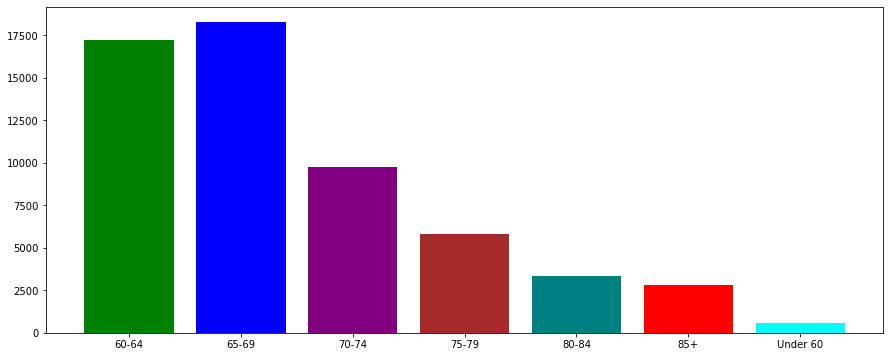

In [109]:
New_Colors = ['green','blue','purple','brown','teal','red', 'cyan', 'magenta', 'yellow', 'black']
plt.figure(figsize=(15,6))
plt.bar('Age_Range', 'Age_Count', data = age_count,color= New_Colors )

In [110]:
demographic.head(2)

,CallReportNum,CallerNum,CallDateAndTimeStart,Birth Year,Age,demographics - # of People in Household,demographics - Other Language,Notes (Optional) - Notes,demographics - Gender,demographics - Household Income Level,demographics - How did you first hear about the program?,demographics - Preferred Language/Language Needed,demographics - Race/Ethnicity,demographics - What other assistance programs are you on?,demographics - When is the last time you visited your dentist?,Age Category
0,93115324,3638169,2021-09-30 16:56:00,1960,61,1.0,NaN,NaN,Female,$0 - $21 280,Other,English,African American,SNAP; SSI/SSDI,NaN,60-64
1,93115188,4431194,2021-09-30 16:53:00,1959,62,1.0,NaN,NaN,Female,$0 - $21 280,Dental Clinic Staff,English,Caucasian,NaN,More than 5 years,60-64


In [111]:
demographic['CallerNum'].unique()

array([3638169, 4431194, 2941341, ..., 2385054, 2385074, 2384897],
      dtype=int64)

In [112]:
demographic.CallerNum.value_counts()

3212379    54
2441776    43
2758373    42
2431132    37
2416076    35
           ..
2768284     1
3232210     1
2391974     1
3084762     1
2796099     1
Name: CallerNum, Length: 10708, dtype: int64

In [113]:
age_plot = demographic[['CallerNum', 'Age Category']]
age_plot

,CallerNum,Age Category
0,3638169,60-64
1,4431194,60-64
2,2941341,75-79
3,3823933,60-64
4,3348256,65-69
...,...,...
57854,2384744,65-69
57855,2385621,60-64
57856,2631417,60-64
57858,3239813,60-64


In [114]:
age_plot = age_plot.drop_duplicates()
age_plot

,CallerNum,Age Category
0,3638169,60-64
1,4431194,60-64
2,2941341,75-79
3,3823933,60-64
4,3348256,65-69
...,...,...
57828,2385088,75-79
57831,2385054,80-84
57834,2385074,80-84
57838,2384980,70-74


In [115]:
gender_plot = demographic[['CallerNum', 'demographics - Gender']].drop_duplicates()
gender_plot

,CallerNum,demographics - Gender
0,3638169,Female
1,4431194,Female
2,2941341,Male
3,3823933,Male
4,3348256,Female
...,...,...
57828,2385088,Female
57831,2385054,Female
57834,2385074,Female
57843,2384932,Female


In [119]:
gender_plot= pd.DataFrame(gender_plot['demographics - Gender'].value_counts()).reset_index().rename(columns={'index':'Gender', 'demographics - Gender':'Gender_Count'})


In [120]:
gender_plot

,Gender,Gender_Count
0,Female,6783
1,Male,3823
2,Other,1
3,Transgender,1


In [124]:
race_plot = demographic[['CallerNum', 'demographics - Race/Ethnicity']].drop_duplicates()
race_plot.head()

,CallerNum,demographics - Race/Ethnicity
0,3638169,African American
1,4431194,Caucasian
2,2941341,Asian
3,3823933,African American
4,3348256,African American


In [125]:
race_plot= pd.DataFrame(race_plot['demographics - Race/Ethnicity'].value_counts()).reset_index().rename(columns= {'index':'Race/Ethnicity','demographics - Race/Ethnicity': 'Race/Ethnicity_Count'})
race_plot

,Race/Ethnicity,Race/Ethnicity_Count
0,Caucasian,5956
1,African American,2670
2,Hispanic,460
3,Asian,152
4,Unknown,115
5,American Indian and Alaska Native,52
6,Multi-racial,33
7,Pacific Islander,10


In [127]:
language_plot = demographic[['CallerNum', 'demographics - Preferred Language/Language Needed']].drop_duplicates()
language_plot.head()

,CallerNum,demographics - Preferred Language/Language Needed
0,3638169,English
1,4431194,English
2,2941341,NaN
3,3823933,NaN
4,3348256,NaN


In [128]:
language_plot= pd.DataFrame(language_plot['demographics - Preferred Language/Language Needed'].value_counts()).reset_index()
language_plot

,index,demographics - Preferred Language/Language Needed
0,English,8411
1,Spanish,377
2,Other,120
3,Arabic,64


### Plotting subsets created above

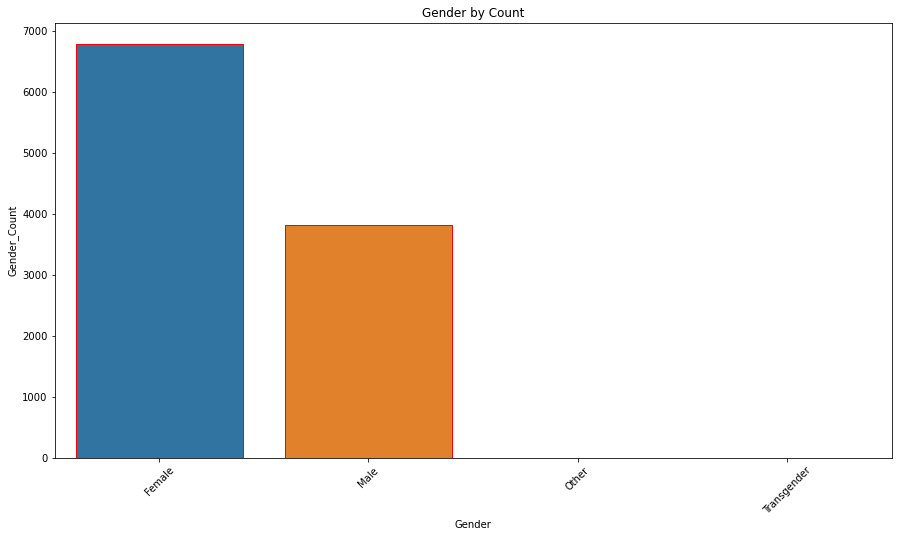

In [122]:
ax = sns.barplot(x="Gender", y="Gender_Count", data=gender_plot, edgecolor = 'red')
ax.set_ylabel("Gender_Count")
ax.set_xlabel("Gender")
plt.xticks(rotation=45)
plt.title("Gender by Count")
plt.gcf().set_size_inches(15, 8)

(-1.1142515142407745,
 1.1188723193496017,
 -1.1141053193944561,
 1.1189153306635111)

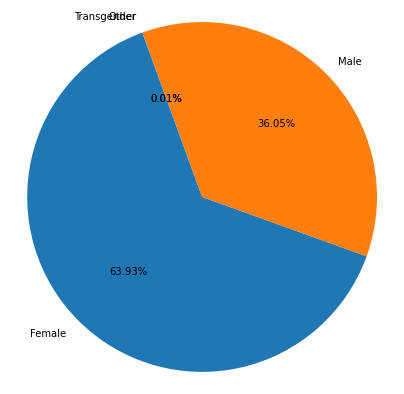

In [123]:
slices = [6794,3831,1,1]
langs = ['Female','Male','Other','Transgender']
labels= langs
sizes= slices
#explode =(0,0,0,0.2,0)
fig,ax=plt.subplots(figsize= (7,7))
ax.pie(sizes,labels=labels, autopct='%1.2f%%',shadow= False, startangle= 110)
ax.axis('equal')

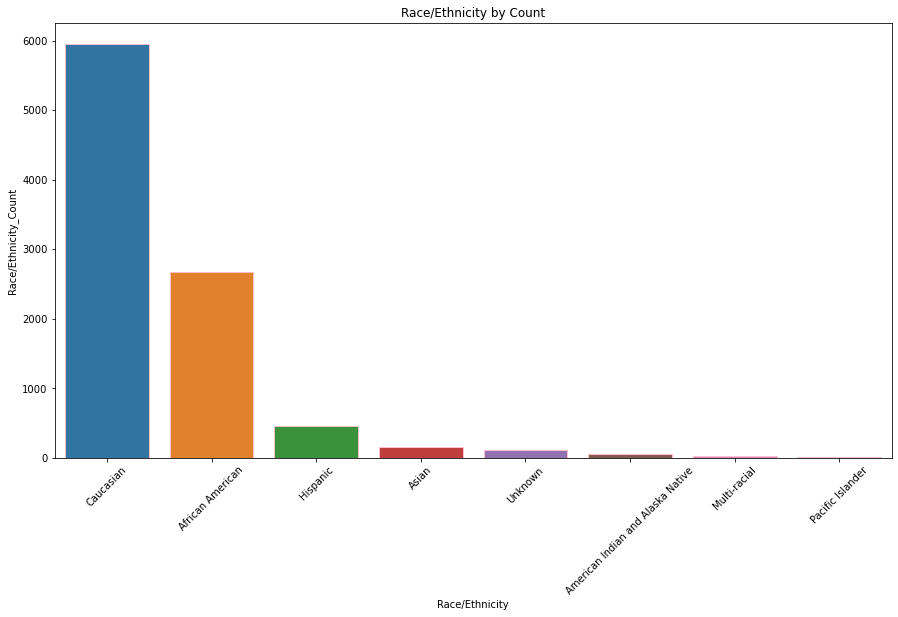

In [126]:
ax = sns.barplot(x="Race/Ethnicity", y="Race/Ethnicity_Count", data=race_plot, edgecolor = 'pink')
ax.set_ylabel("Race/Ethnicity_Count")
ax.set_xlabel("Race/Ethnicity")
plt.xticks(rotation=45)
plt.title("Race/Ethnicity by Count")
plt.gcf().set_size_inches(15, 8)

(-1.1081672483550289,
 1.1058497064342407,
 -1.107487160667889,
 1.1013709852727516)

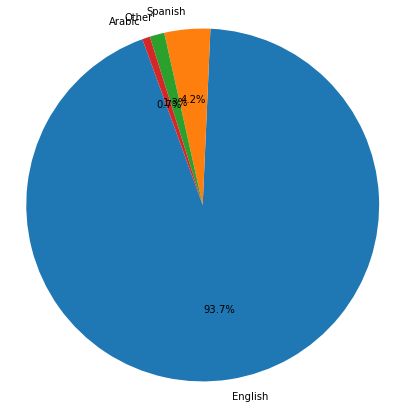

In [129]:
slices = [8411,377,120,64]
langs = ['English','Spanish','Other','Arabic']
labels= langs
sizes= slices
#explode =(0,0,0,0.2,0)
fig,ax=plt.subplots(figsize= (7,7))
ax.pie(sizes,labels=labels, autopct='%1.1f%%',shadow= False, startangle= 110)
ax.axis('equal')

### Create .csv files to import into PowerBI

In [ ]:
demographic.to_csv(r'C:\Users\hudso\Documents\NSS\Bootcamp\Python\Projects\smile_on-dda5_parcheesi\data\demographic.csv', index = False)

In [ ]:
codes.to_csv(r'C:\Users\hudso\Documents\NSS\Bootcamp\Python\Projects\smile_on-dda5_parcheesi\data\codes.csv', index = False)

In [ ]:
outcomes.to_csv(r'C:\Users\hudso\Documents\NSS\Bootcamp\Python\Projects\smile_on-dda5_parcheesi\data\outcomes.csv', index = False)